## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests, json

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 크롤링
from bs4 import BeautifulSoup
import openpyxl

# Linear, Logistic
from sklearn.linear_model import LinearRegression, LogisticRegression

# knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# decision
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# svm
from sklearn.svm import SVC, SVR

# bagging
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# boosting
from xgboost import XGBClassifier, XGBRegressor

### **나.  학습데이터 불러오기**

In [2]:
data = pd.read_csv('train_dataset.csv')

In [3]:
target = 'Result_v1'

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

* 데이터 정보

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3664 non-null   int64  
 1   url_len                  3664 non-null   float64
 2   url_num_hyphens_dom      3664 non-null   float64
 3   url_path_len             3663 non-null   float64
 4   url_domain_len           3663 non-null   float64
 5   url_hostname_len         3664 non-null   float64
 6   url_num_dots             3664 non-null   float64
 7   url_num_underscores      3664 non-null   float64
 8   url_query_len            3664 non-null   float64
 9   url_num_query_para       3664 non-null   float64
 10  url_ip_present           3664 non-null   float64
 11  url_entropy              3664 non-null   float64
 12  url_chinese_present      3664 non-null   float64
 13  url_port                 3664 non-null   float64
 14  html_num_tags('iframe') 

* 기초통계량

In [5]:
data.describe()

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,1831.500000,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,...,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,1057.850021,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,...,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,0.000000,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,915.750000,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,1831.500000,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,2747.250000,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,3663.000000,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,...,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [6]:
col = list(data.columns[1:-1])
col

['url_len',
 'url_num_hyphens_dom',
 'url_path_len',
 'url_domain_len',
 'url_hostname_len',
 'url_num_dots',
 'url_num_underscores',
 'url_query_len',
 'url_num_query_para',
 'url_ip_present',
 'url_entropy',
 'url_chinese_present',
 'url_port',
 "html_num_tags('iframe')",
 "html_num_tags('script')",
 "html_num_tags('embed')",
 "html_num_tags('object')",
 "html_num_tags('div')",
 "html_num_tags('head')",
 "html_num_tags('body')",
 "html_num_tags('form')",
 "html_num_tags('a')",
 "html_num_tags('applet')"]

In [7]:
def numeric_plot(col):
    print(data[col].describe())
    
    q1 = data[col].quantile(.25)
    q3 = data[col].quantile(.75)
    iqr = q3 - q1
    min_iqr = max((q1 - (1.5*iqr)), data[col].min())
    max_iqr = min((q1 + (1.5*iqr)), data[col].max())

    if min_iqr != data[col].min():
        print(f'이상치 numer : {min_iqr}')

    if max_iqr != data[col].max():
        print(f'이상치 over : {max_iqr}')
        
        
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(data=data, x=col, kde=True)
    plt.grid()

    plt.subplot(1,2,2)
    plt.boxplot(data=data, x=col)

    plt.show()

def class_plot(col):
    print(data[col].describe())
    print(data[col].unique())

    sns.countplot(data=data, x=col)
    plt.show()

### target : Result_v1

count       3664
unique         2
top       benign
freq        1858
Name: Result_v1, dtype: object
['malicious' 'benign']


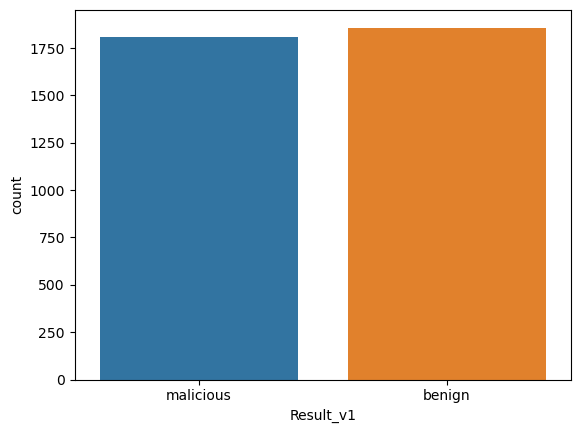

In [8]:
class_plot('Result_v1')

In [9]:
data.groupby(by='Result_v1', as_index=False)['url_len'].count()

,Result_v1,url_len
0,benign,1858
1,malicious,1806


### feature

url_len
count    3664.000000
mean       54.559225
std        82.493265
min         6.000000
25%        24.000000
50%        36.000000
75%        55.000000
max      1837.000000
Name: url_len, dtype: float64
이상치 over : 70.5


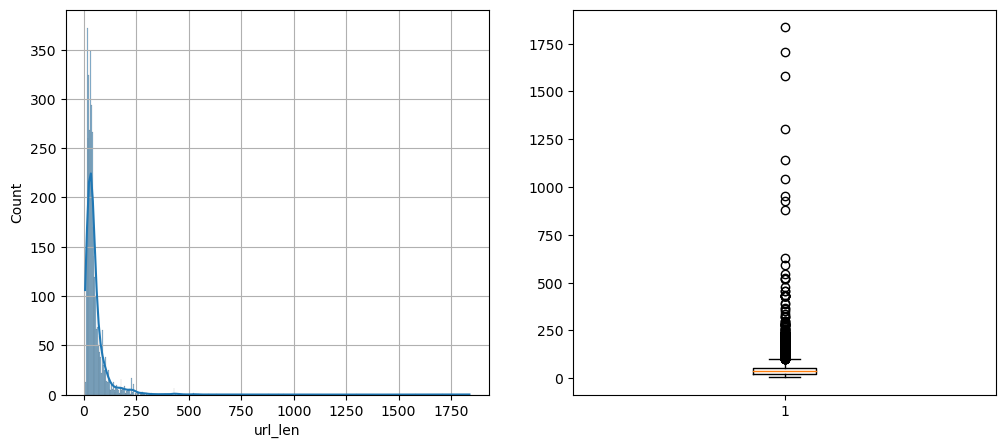

--------------------------------------------------
url_num_hyphens_dom
count    3664.000000
mean        0.412937
std         0.847058
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: url_num_hyphens_dom, dtype: float64
이상치 over : 1.5


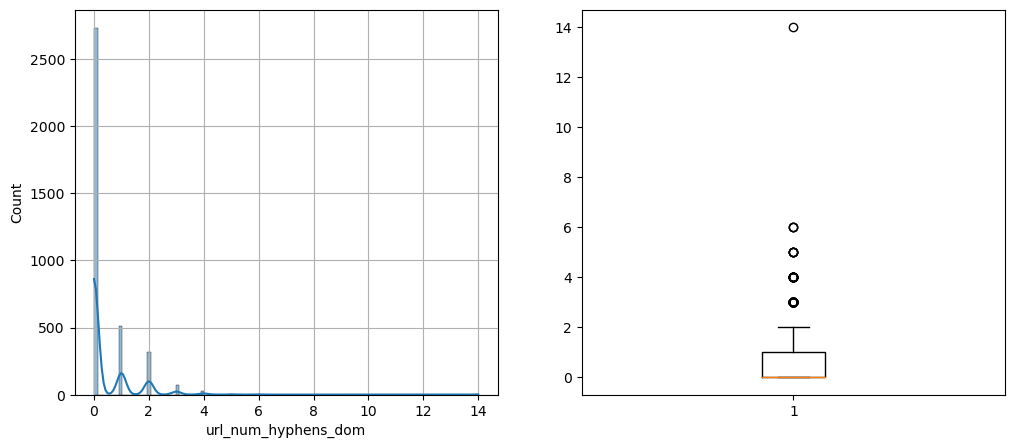

--------------------------------------------------
url_path_len
count    3663.000000
mean       29.365820
std        78.595248
min         0.000000
25%         1.000000
50%        13.000000
75%        31.000000
max      1816.000000
Name: url_path_len, dtype: float64
이상치 over : 46.0


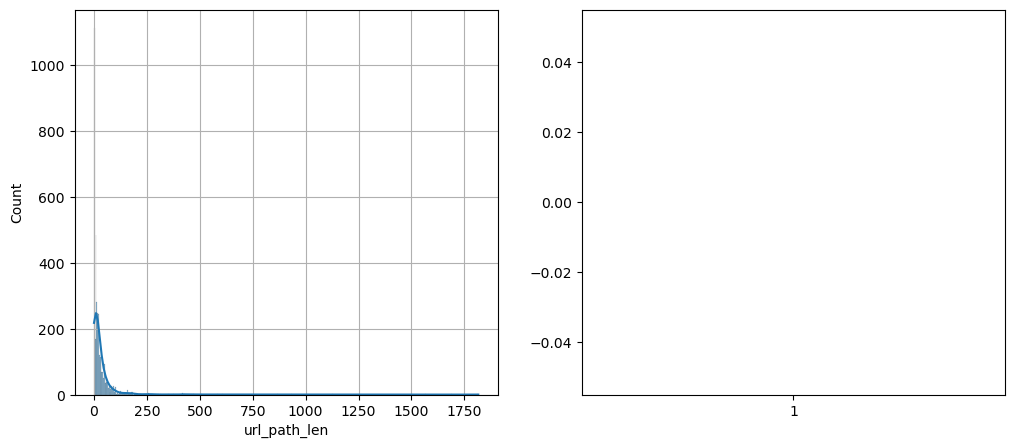

--------------------------------------------------
url_domain_len
count    3663.000000
mean       20.383292
std         9.597012
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_domain_len, dtype: float64
이상치 over : 29.0


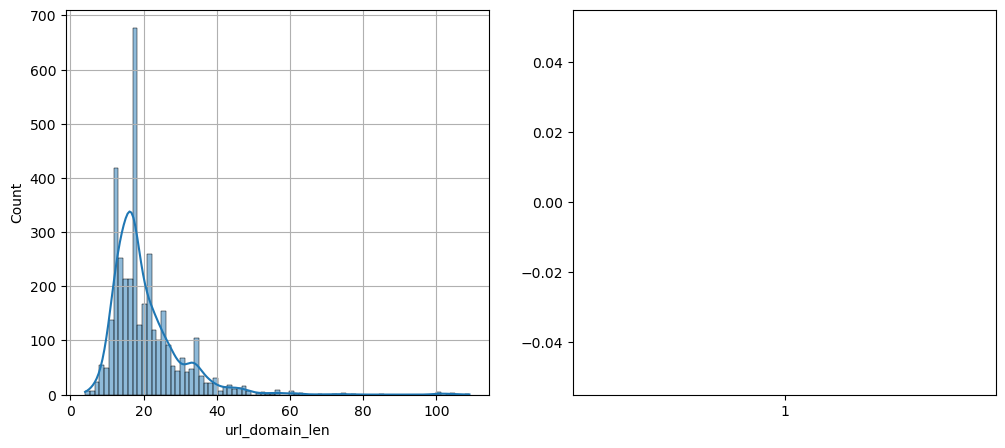

--------------------------------------------------
url_hostname_len
count    3664.000000
mean       20.330513
std         9.628093
min         4.000000
25%        14.000000
50%        17.000000
75%        24.000000
max       109.000000
Name: url_hostname_len, dtype: float64
이상치 over : 29.0


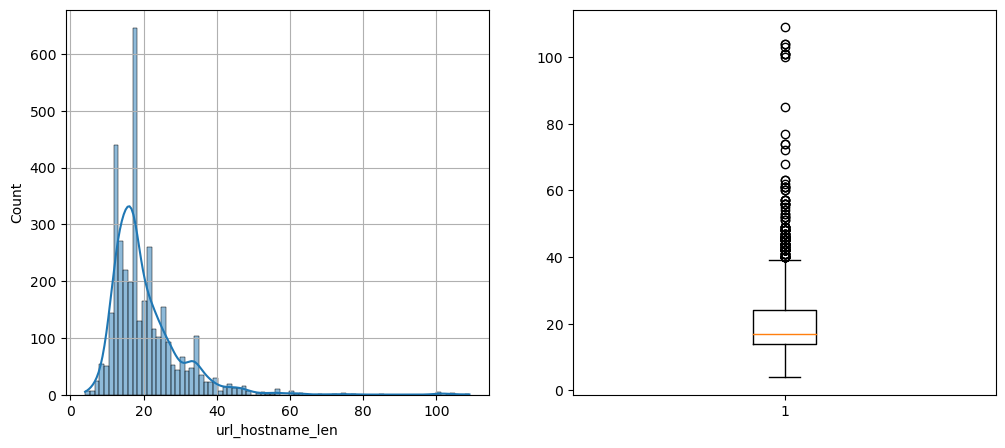

--------------------------------------------------
url_num_dots
count    3664.000000
mean        2.516921
std         1.534119
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        32.000000
Name: url_num_dots, dtype: float64
이상치 over : 3.5


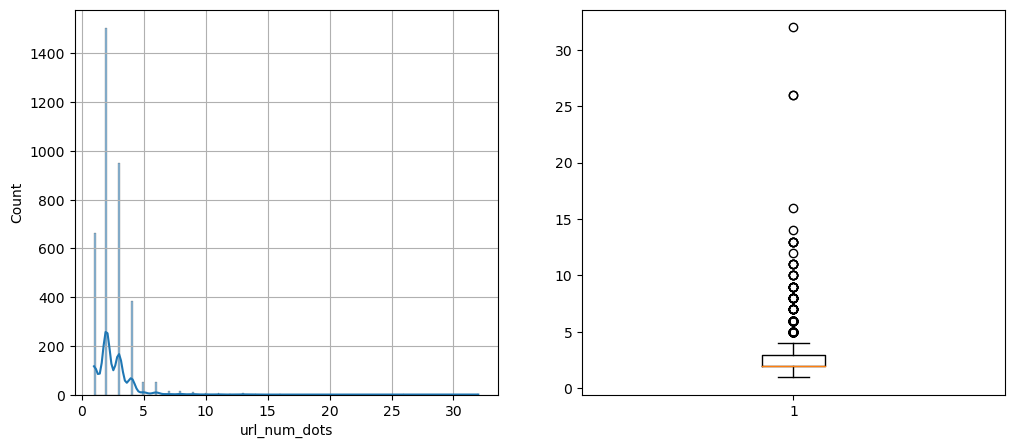

--------------------------------------------------
url_num_underscores
count    3664.000000
mean        0.272653
std         1.124592
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: url_num_underscores, dtype: float64
이상치 over : 0.0


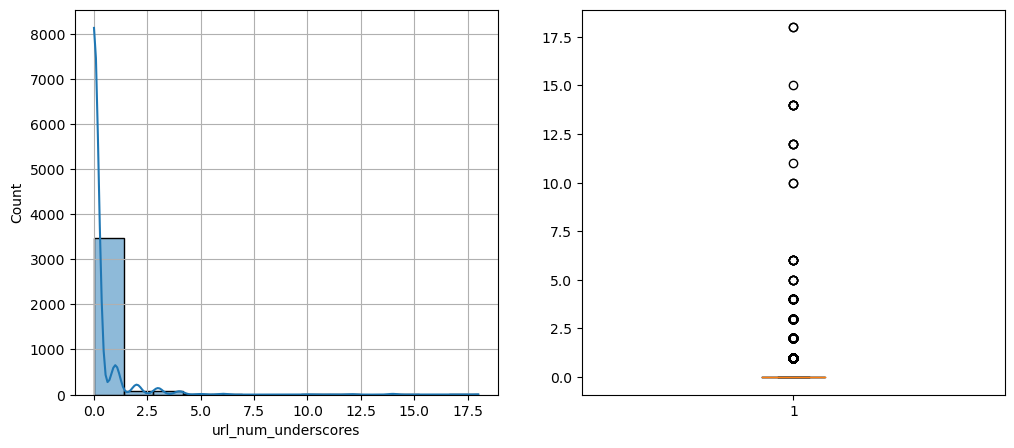

--------------------------------------------------
url_query_len
count    3664.000000
mean        4.707697
std        25.318285
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       429.000000
Name: url_query_len, dtype: float64
이상치 over : 0.0


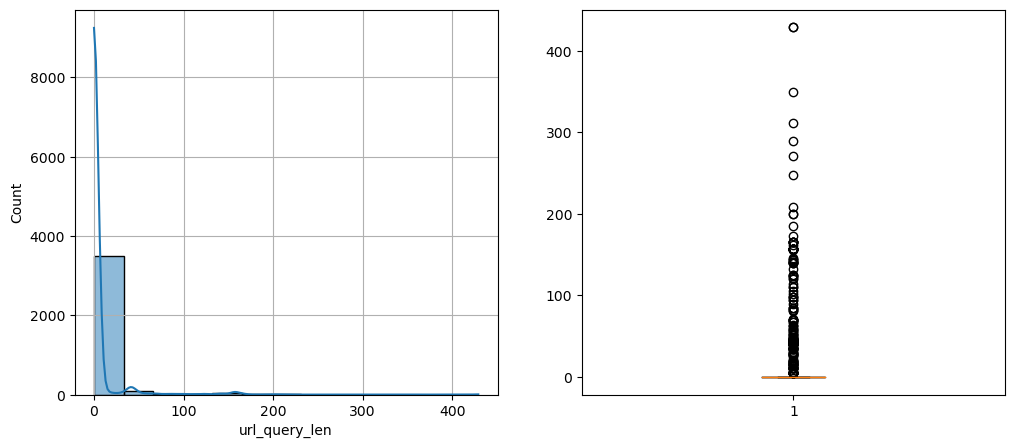

--------------------------------------------------
url_num_query_para
count    3664.000000
mean        0.104258
std         0.574310
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: url_num_query_para, dtype: float64
이상치 over : 0.0


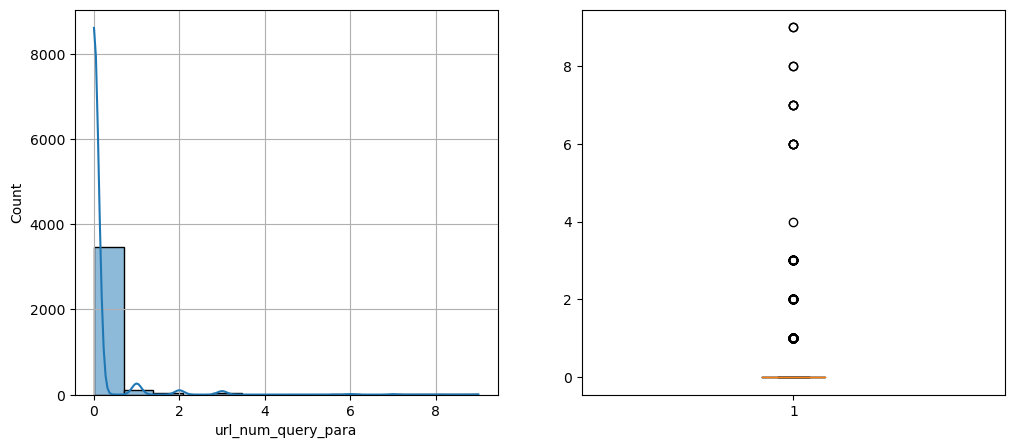

--------------------------------------------------
url_ip_present
count    3664.000000
mean        0.060862
std         0.239110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: url_ip_present, dtype: float64
이상치 over : 0.0


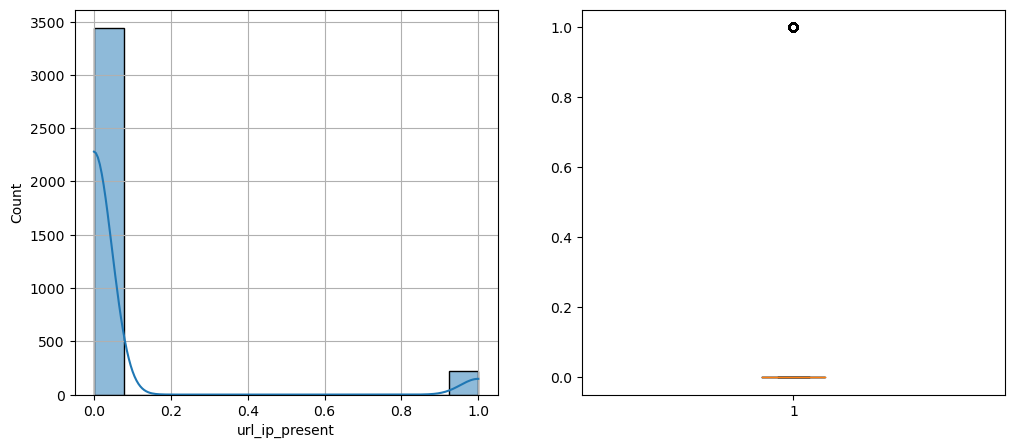

--------------------------------------------------
url_entropy
count    3664.000000
mean        4.228568
std         0.393055
min         2.737839
25%         3.983196
50%         4.189561
75%         4.458940
max         5.821782
Name: url_entropy, dtype: float64
이상치 numer : 3.269578375499999
이상치 over : 4.696812892500001


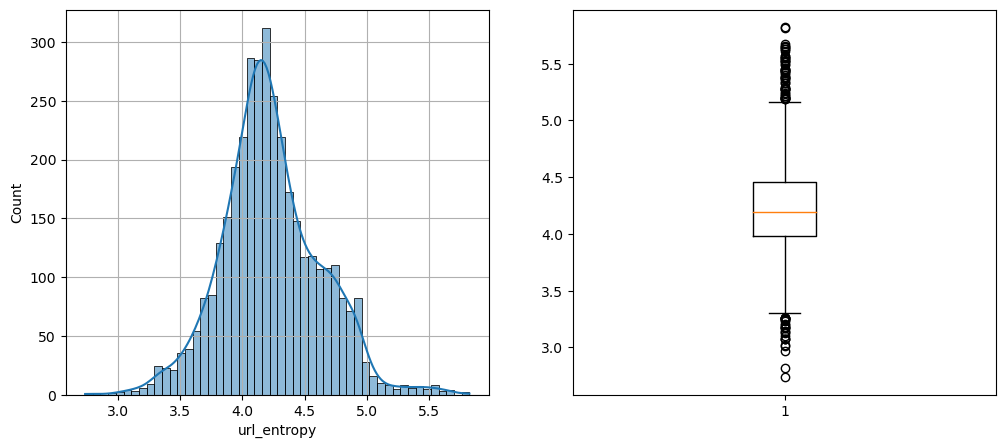

--------------------------------------------------
url_chinese_present
count    3664.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: url_chinese_present, dtype: float64


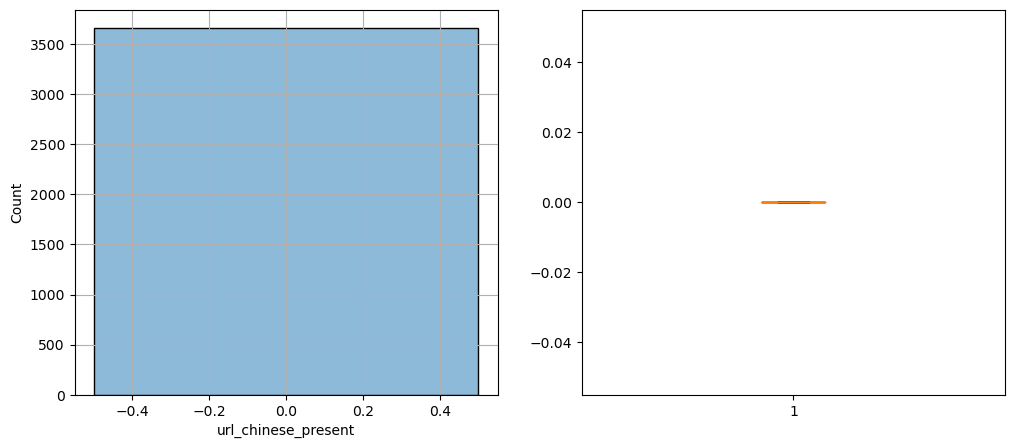

--------------------------------------------------
url_port
count    3664.000000
mean        0.002183
std         0.046682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: url_port, dtype: float64
이상치 over : 0.0


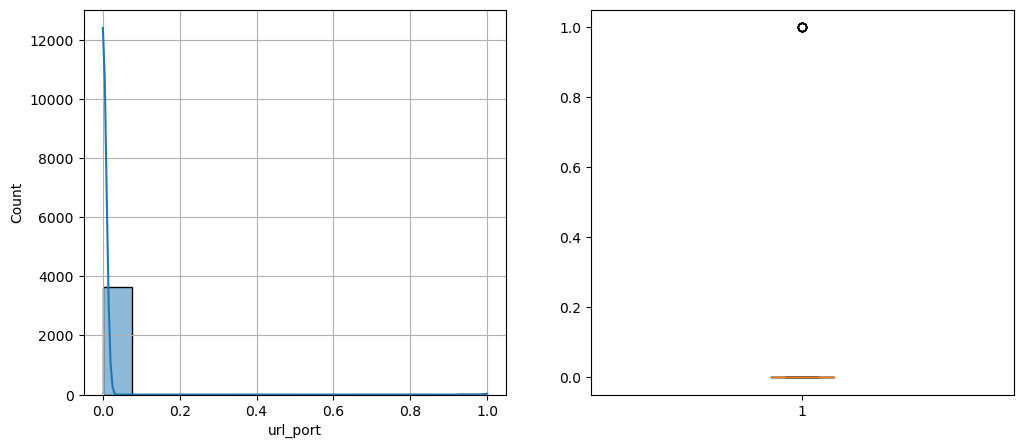

--------------------------------------------------
html_num_tags('iframe')
count    3664.000000
mean        0.220797
std         0.898383
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        26.000000
Name: html_num_tags('iframe'), dtype: float64
이상치 over : 0.0


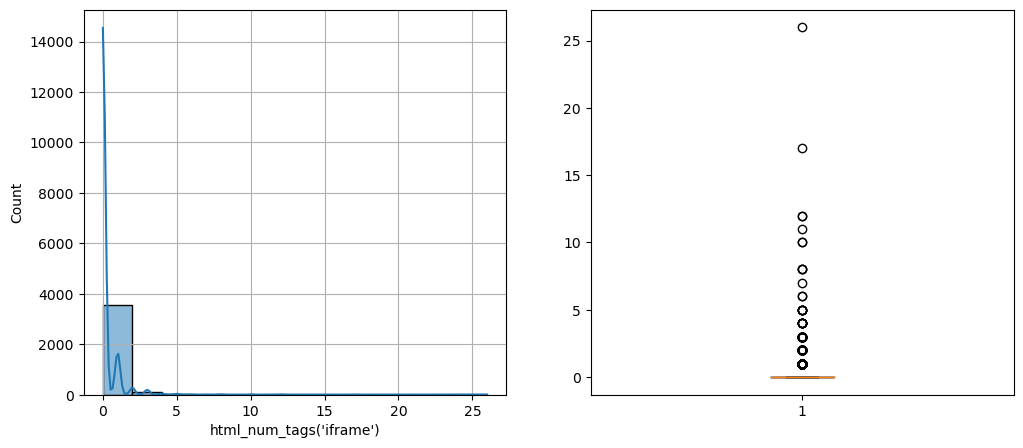

--------------------------------------------------
html_num_tags('script')
count    3664.000000
mean        8.785480
std        12.647356
min         0.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       267.000000
Name: html_num_tags('script'), dtype: float64
이상치 over : 17.0


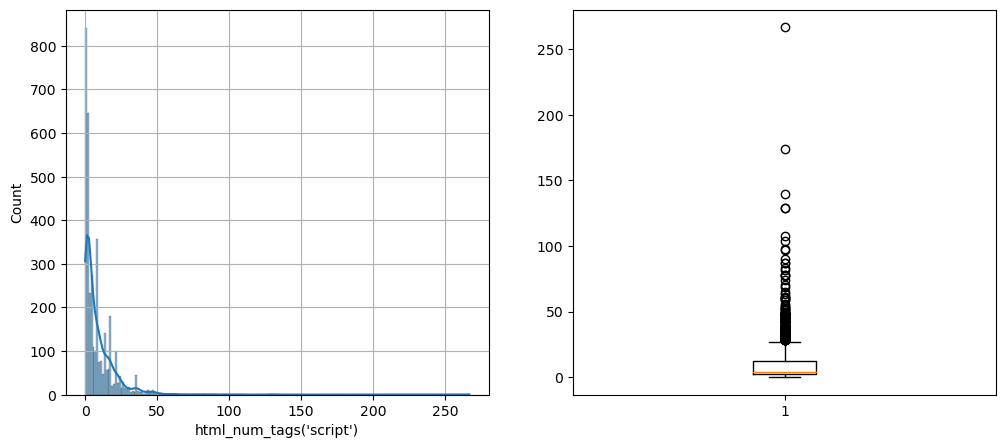

--------------------------------------------------
html_num_tags('embed')
count    3664.000000
mean        0.018013
std         0.144808
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: html_num_tags('embed'), dtype: float64
이상치 over : 0.0


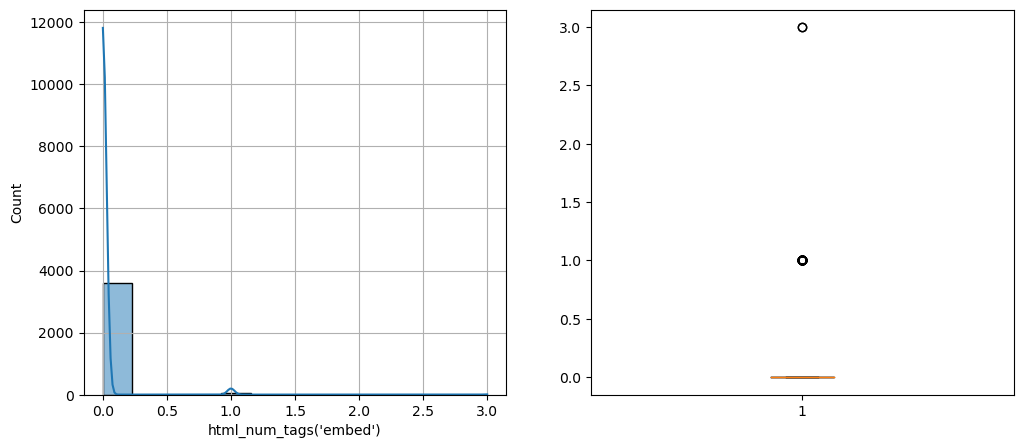

--------------------------------------------------
html_num_tags('object')
count    3664.000000
mean        0.028930
std         0.237682
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.000000
Name: html_num_tags('object'), dtype: float64
이상치 over : 0.0


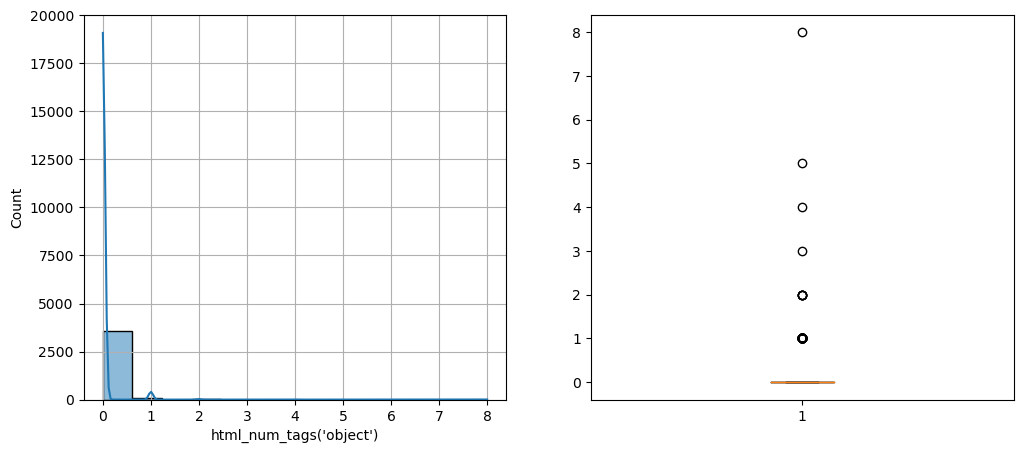

--------------------------------------------------
html_num_tags('div')
count     3664.000000
mean        70.843886
std        365.593304
min          0.000000
25%          6.000000
50%         33.000000
75%         62.000000
max      19941.000000
Name: html_num_tags('div'), dtype: float64
이상치 over : 90.0


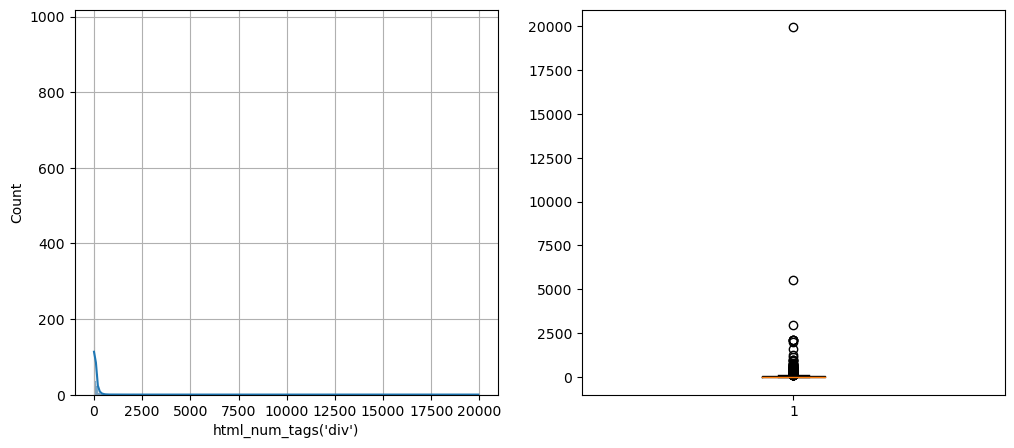

--------------------------------------------------
html_num_tags('head')
count    3664.000000
mean        0.998090
std         0.144974
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: html_num_tags('head'), dtype: float64
이상치 numer : 1.0
이상치 over : 1.0


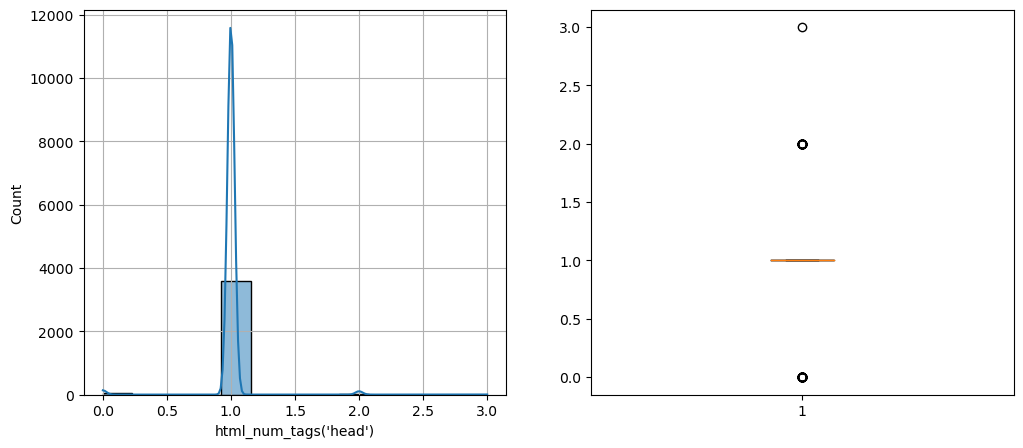

--------------------------------------------------
html_num_tags('body')
count    3664.000000
mean        1.016648
std         0.225330
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: html_num_tags('body'), dtype: float64
이상치 numer : 1.0
이상치 over : 1.0


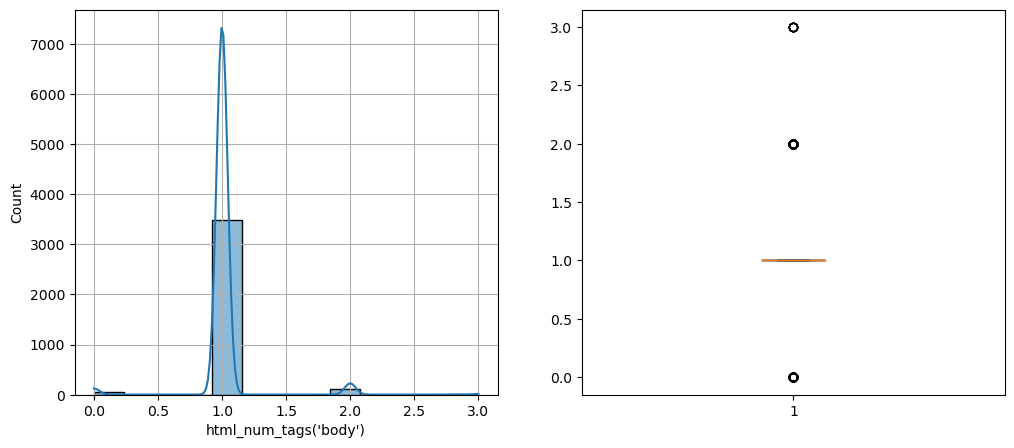

--------------------------------------------------
html_num_tags('form')
count    3664.000000
mean        1.028930
std         1.563903
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        57.000000
Name: html_num_tags('form'), dtype: float64
이상치 over : 1.5


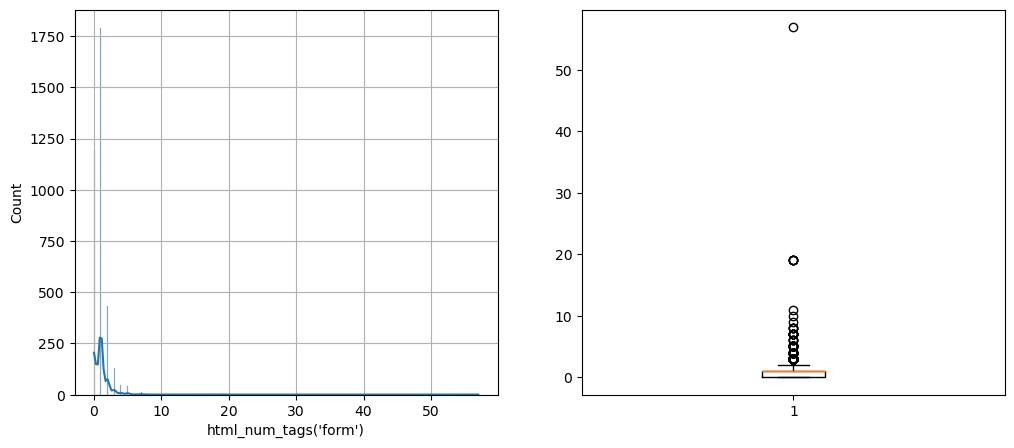

--------------------------------------------------
html_num_tags('a')
count     3664.000000
mean        66.182860
std        342.651459
min          0.000000
25%          2.000000
50%         16.000000
75%         52.000000
max      13451.000000
Name: html_num_tags('a'), dtype: float64
이상치 over : 77.0


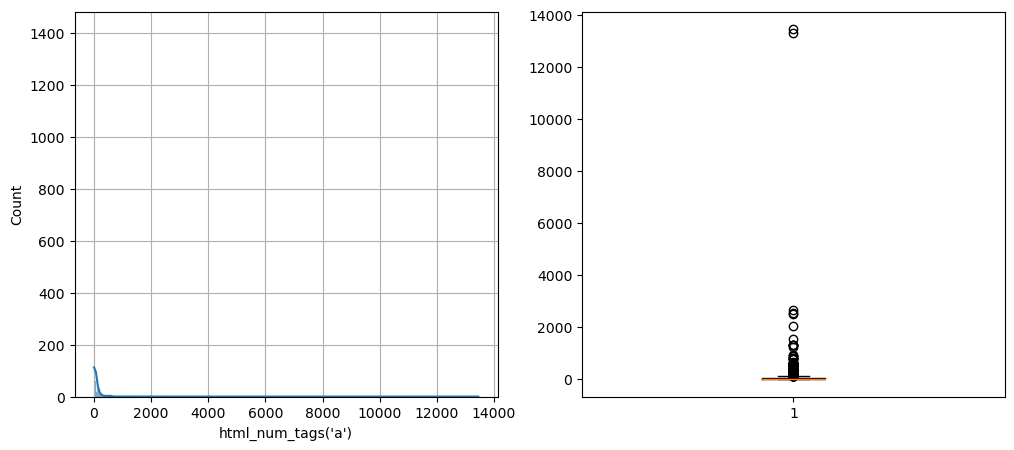

--------------------------------------------------
html_num_tags('applet')
count    3664.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: html_num_tags('applet'), dtype: float64


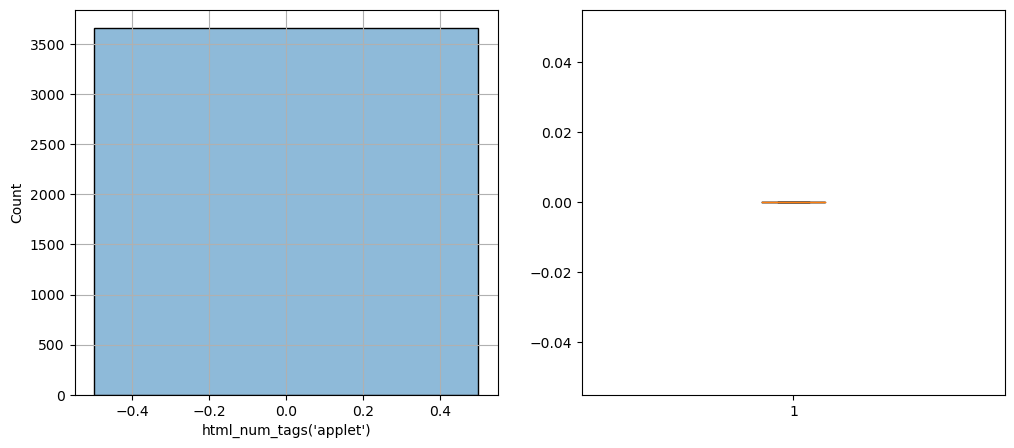

--------------------------------------------------


In [10]:
for c in col:
    print(c)
    numeric_plot(c)
    
    print('-----' * 10)

In [11]:
data['url_chinese_present'].unique()

array([0.])

In [12]:
data["html_num_tags('applet')"].unique()

array([0.])

1. url_chinese_present / html_num_tags('applet') : 전체 데이터 0으로 필요없는 컬럼
2. url_domain_len / url_hostname_len : 두 컬럼 데이터 값 모두 일치

In [13]:
drop_col = ['url_chinese_present', "html_num_tags('applet')", 'Unnamed: 0']
data = data.drop(drop_col, axis=1)

In [14]:
# 결측치를 적절히 처리해줍니다.
data = data.dropna(axis=0)

In [15]:
# 'benign'은 1로 'malicious'
data[target] = data[target].map({'malicious': 1, 'benign': 0})

In [16]:
col = list(data.columns[:-1])

In [17]:
data.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
url_len,1.000000,-0.022906,0.943060,0.003720,0.004154,0.265969,0.313584,0.325898,0.275220,-0.064344,...,0.019893,-0.031197,-0.010599,-0.021034,-0.015682,0.070790,0.045517,-0.036450,-0.022294,0.007357
url_num_hyphens_dom,-0.022906,1.000000,-0.097759,0.594840,0.595850,-0.086752,-0.060560,0.002239,-0.002032,-0.123792,...,0.006530,-0.100829,-0.051734,-0.048484,-0.010954,0.050909,-0.037450,0.047483,-0.037264,0.354666
url_path_len,0.943060,-0.097759,1.000000,-0.124312,-0.124075,0.200456,0.263007,0.015370,0.014265,-0.033677,...,0.031403,0.002893,-0.002151,-0.014874,-0.010298,0.072815,-0.004283,-0.040979,-0.010509,-0.100681
url_domain_len,0.003720,0.594840,-0.124312,1.000000,0.998949,0.073277,-0.089883,0.016313,0.016493,-0.149946,...,-0.007173,-0.104238,-0.011084,-0.028947,-0.002318,0.011323,0.030874,0.028952,-0.037186,0.379331
url_hostname_len,0.004154,0.595850,-0.124075,0.998949,1.000000,0.069593,-0.091174,0.017373,0.017526,-0.168319,...,-0.006445,-0.101480,-0.010310,-0.030284,-0.001312,0.011211,0.031223,0.031806,-0.035993,0.383235
url_num_dots,0.265969,-0.086752,0.200456,0.073277,0.069593,1.000000,0.252406,0.213563,0.182729,0.185958,...,-0.000986,-0.084627,-0.030849,-0.017047,-0.031807,-0.026251,-0.000408,-0.069857,-0.030861,-0.045959
url_num_underscores,0.313584,-0.060560,0.263007,-0.089883,-0.091174,0.252406,1.000000,0.238256,0.237892,-0.048390,...,-0.023698,-0.058170,-0.028507,-0.021364,-0.018435,0.060131,0.029475,-0.074659,-0.004402,-0.128536
url_query_len,0.325898,0.002239,0.015370,0.016313,0.017373,0.213563,0.238256,1.000000,0.838149,-0.047256,...,-0.029678,-0.069995,-0.023149,-0.010992,-0.017870,0.000147,0.149048,-0.002471,-0.025316,0.188576
url_num_query_para,0.275220,-0.002032,0.014265,0.016493,0.017526,0.182729,0.237892,0.838149,1.000000,-0.046136,...,-0.032484,-0.068097,-0.022600,-0.016115,-0.016296,-0.017279,0.108933,-0.007009,-0.025142,0.184108
url_ip_present,-0.064344,-0.123792,-0.033677,-0.149946,-0.168319,0.185958,-0.048390,-0.047256,-0.046136,1.000000,...,-0.025528,-0.083482,-0.031613,0.050901,-0.033256,0.011241,-0.018777,-0.082260,-0.038047,-0.078929


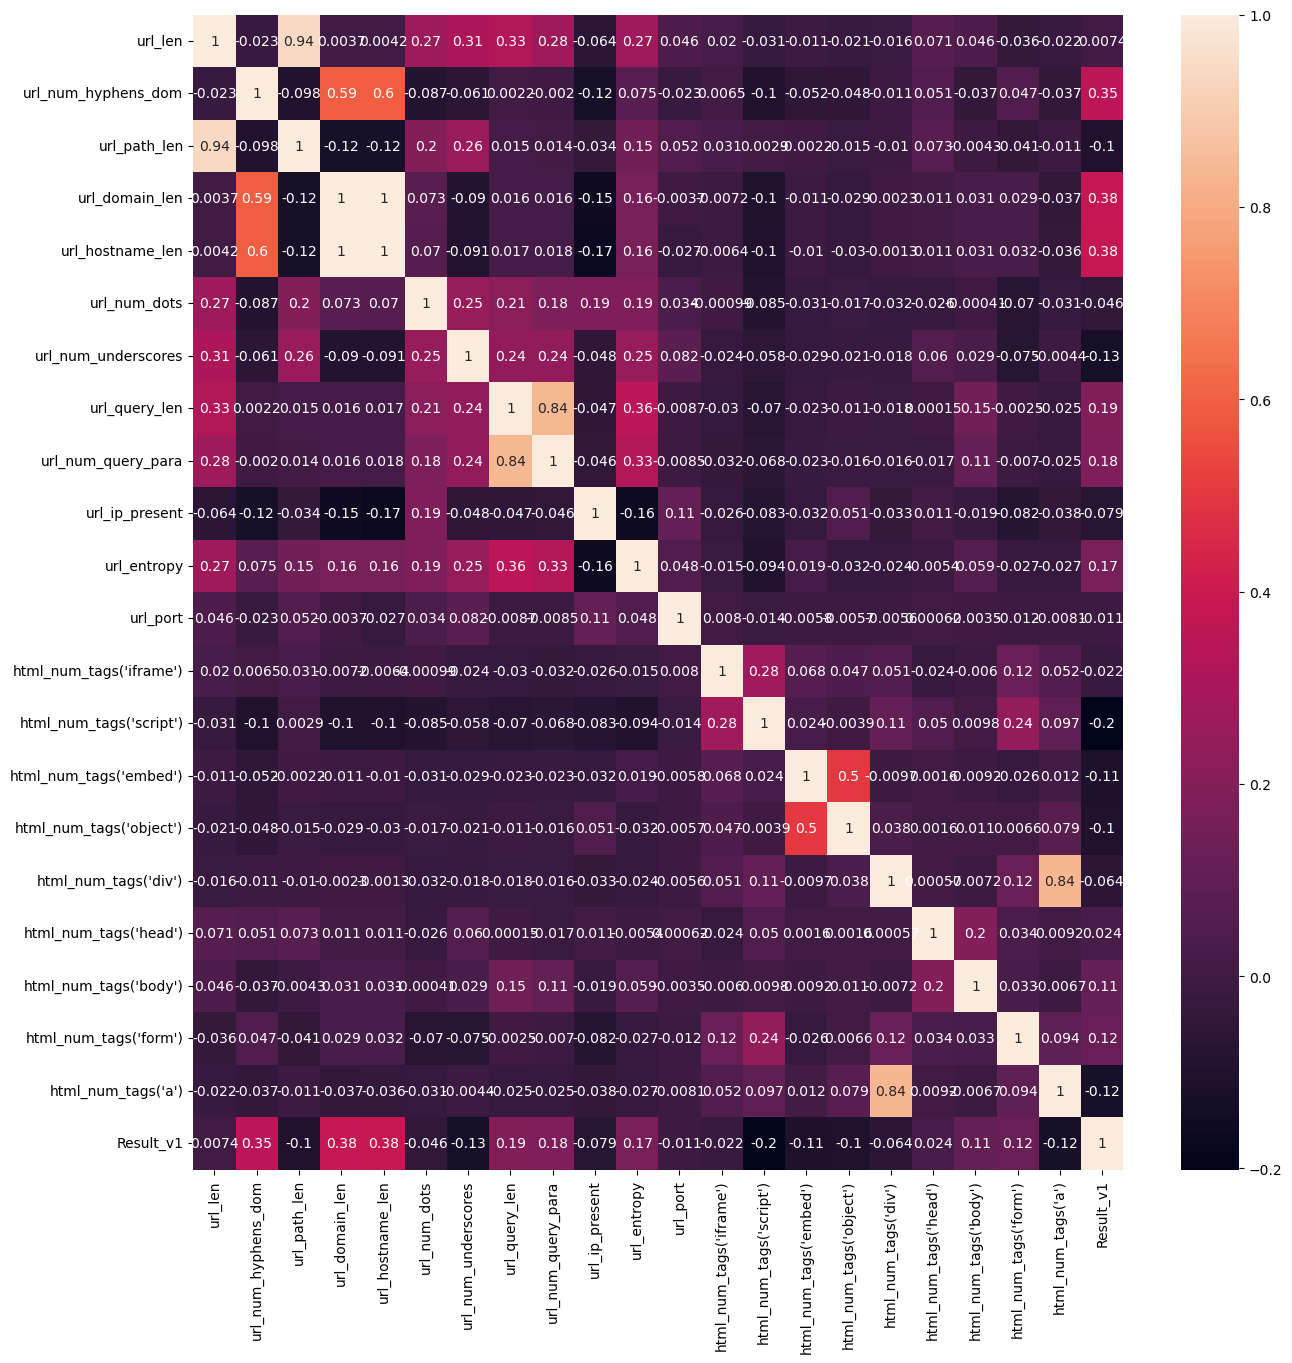

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [19]:
import statsmodels.api as sm
def feature_plot(col):
    print(col)
    print(data.groupby(by=target, as_index=False)[col].mean())

    m = data.loc[data[target] == 1, col].mean()
    b = data.loc[data[target] == 0, col].mean()

    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.kdeplot(data=data, x=col, hue=target)
    plt.grid()
    # plt.axvline(m, color = 'r')
    # plt.axvline(b, color = 'g')

    plt.subplot(1,2,2)
    sns.kdeplot(data=data, x=col, hue=target, multiple='fill')
    plt.yticks(np.linspace(0,1,10))

    plt.show()
    model = sm.Logit(data[target], data[col])
    result = model.fit()
    print(result.pvalues)
    print('-----'*10)


In [20]:
col = list(data.columns[:-1])

url_len
   Result_v1    url_len
0          0  53.973599
1          1  55.187708


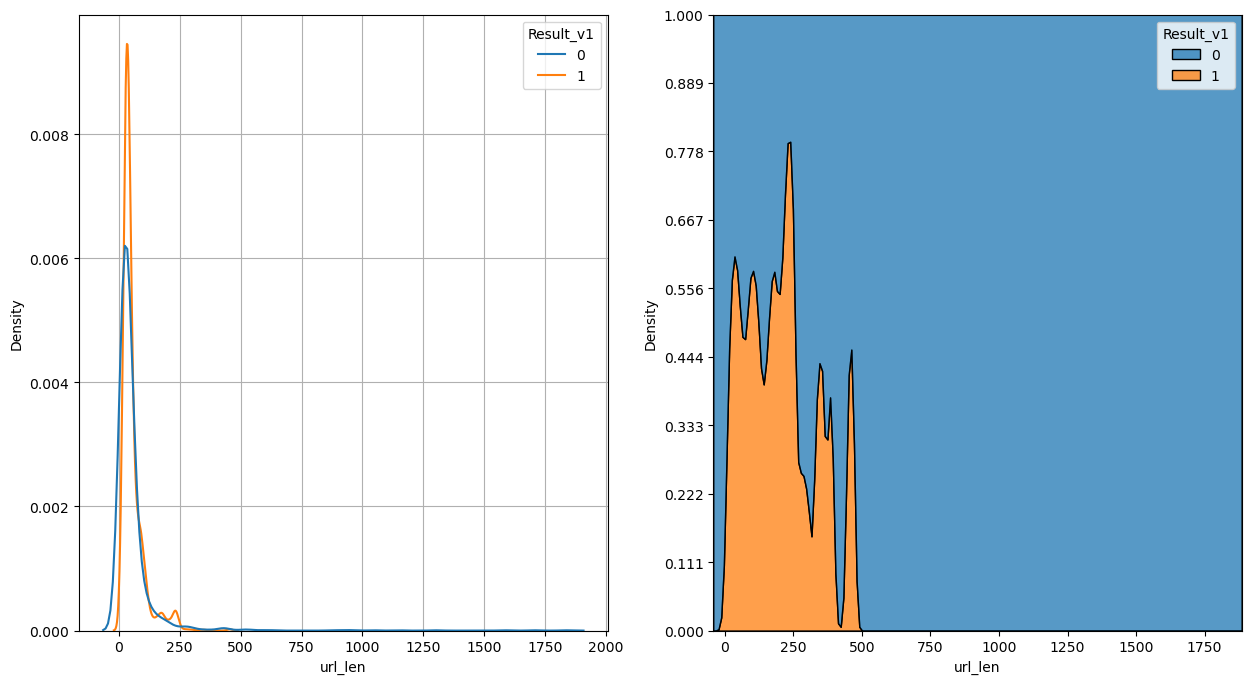

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_len    0.932637
dtype: float64
--------------------------------------------------
url_num_hyphens_dom
   Result_v1  url_num_hyphens_dom
0          0             0.116379
1          1             0.717054


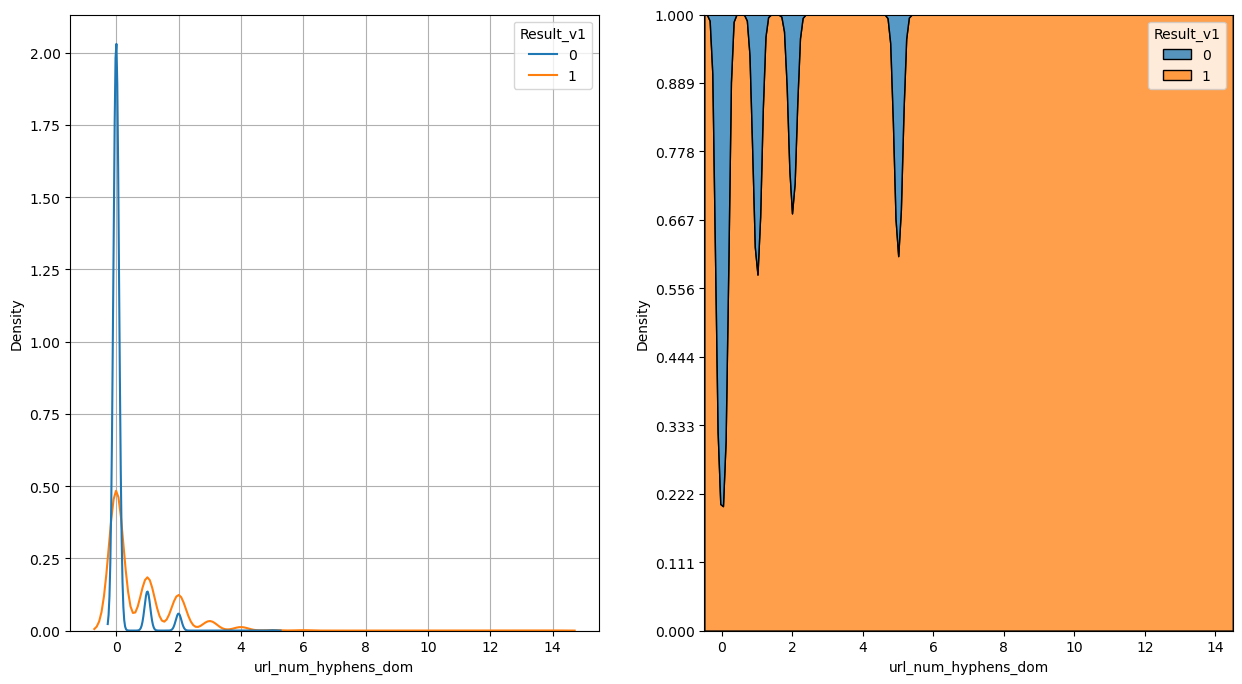

Optimization terminated successfully.
         Current function value: 0.631764
         Iterations 6
url_num_hyphens_dom    1.208474e-61
dtype: float64
--------------------------------------------------
url_path_len
   Result_v1  url_path_len
0          0     37.179418
1          1     21.352159


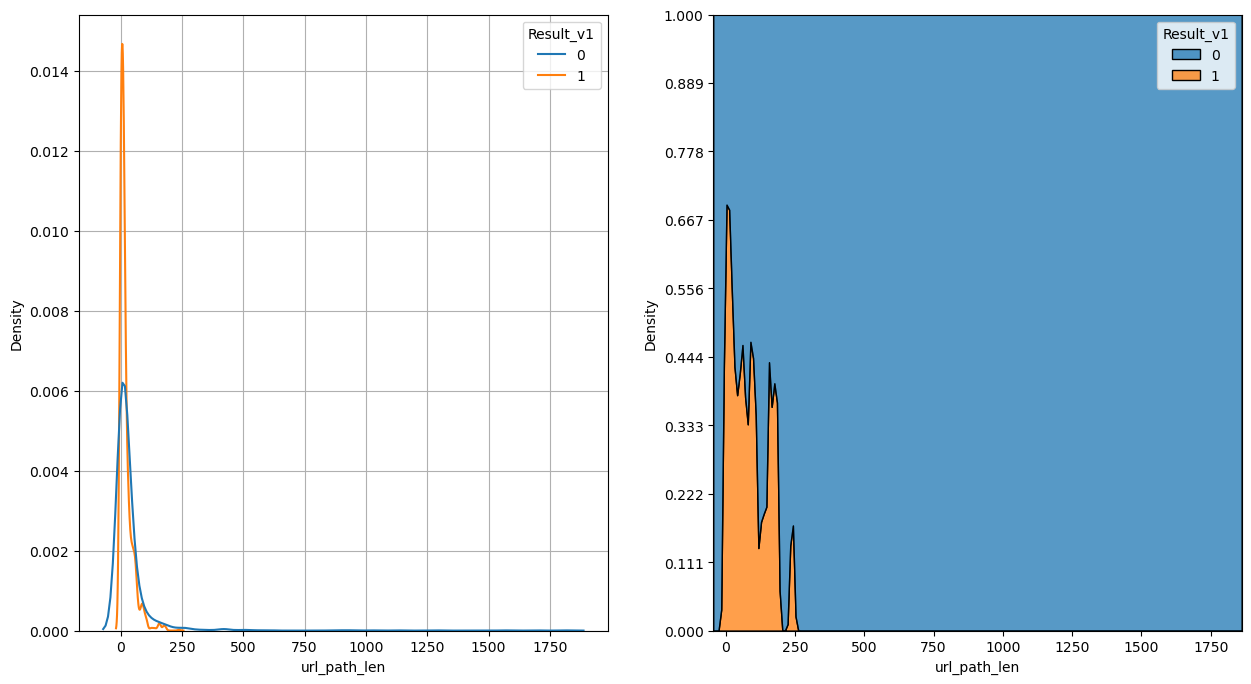

Optimization terminated successfully.
         Current function value: 0.686528
         Iterations 5
url_path_len    4.907666e-09
dtype: float64
--------------------------------------------------
url_domain_len
   Result_v1  url_domain_len
0          0       16.794181
1          1       24.075305


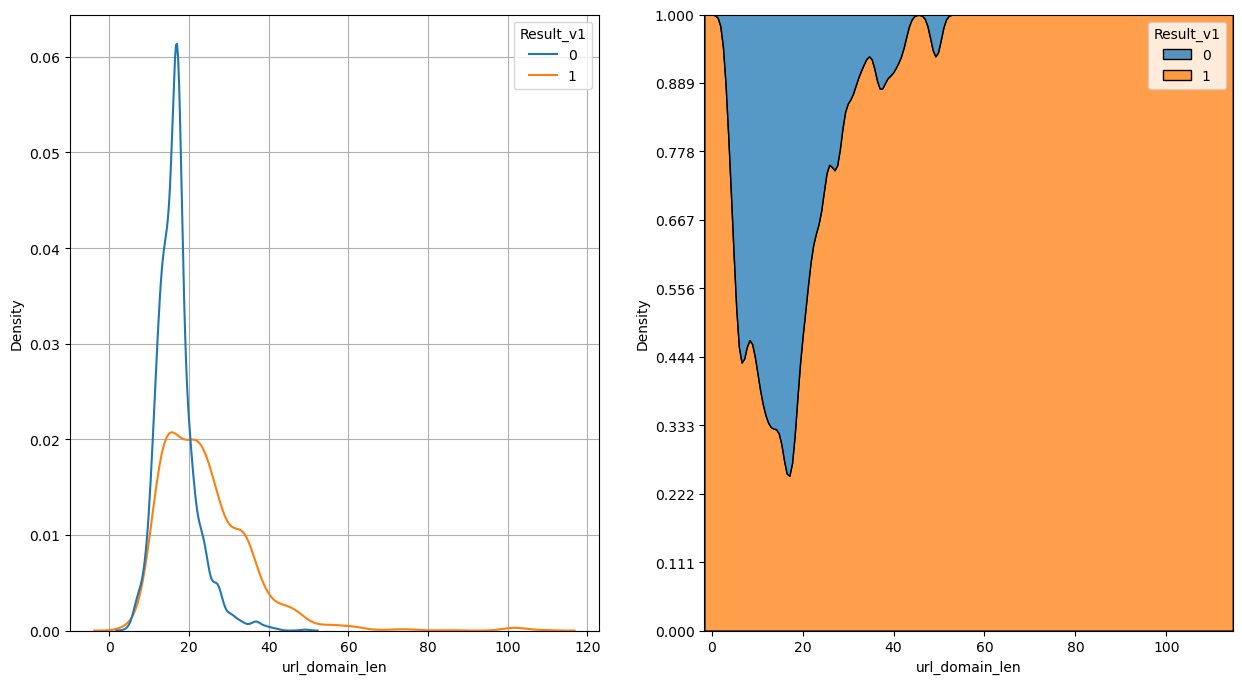

Optimization terminated successfully.
         Current function value: 0.681897
         Iterations 4
url_domain_len    3.815200e-19
dtype: float64
--------------------------------------------------
url_hostname_len
   Result_v1  url_hostname_len
0          0         16.689116
1          1         24.066999


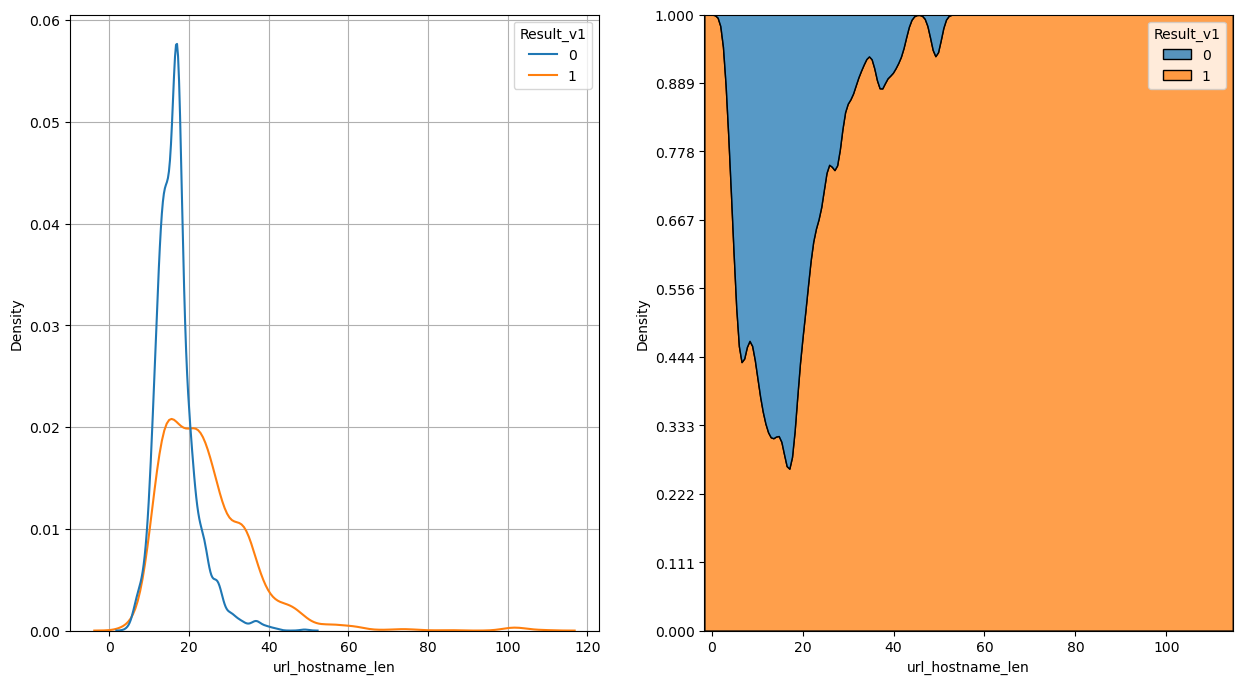

Optimization terminated successfully.
         Current function value: 0.681520
         Iterations 4
url_hostname_len    1.028186e-19
dtype: float64
--------------------------------------------------
url_num_dots
   Result_v1  url_num_dots
0          0      2.586207
1          1      2.445183


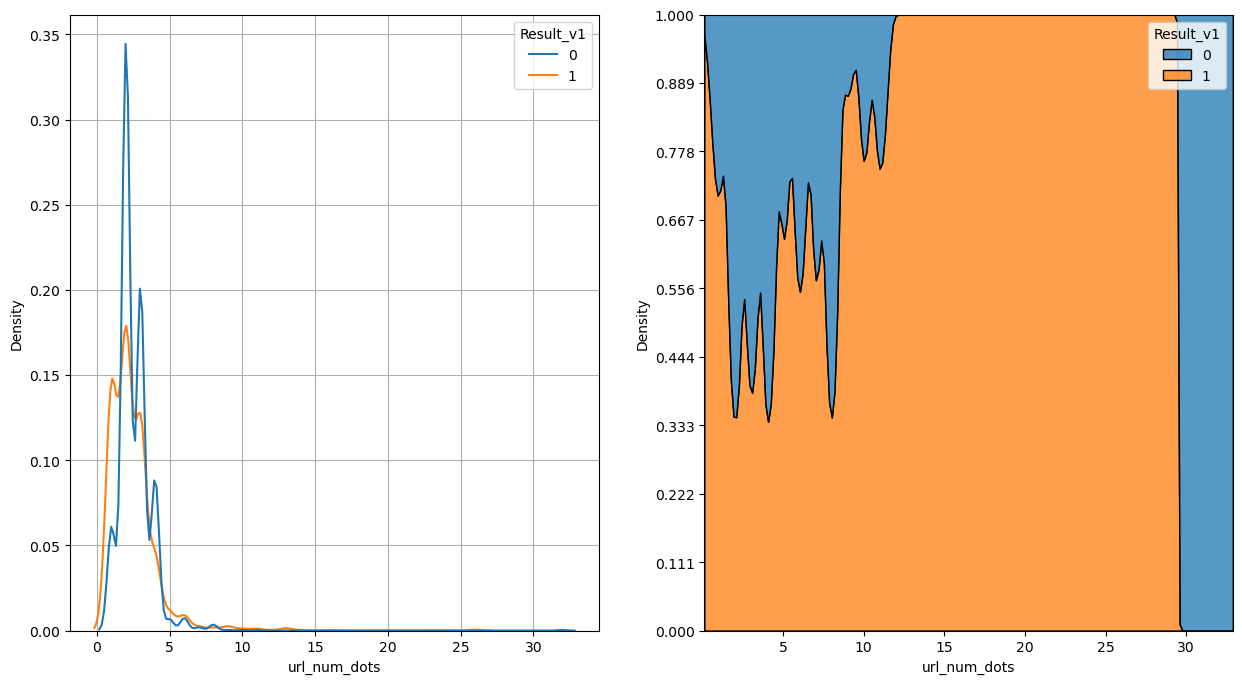

Optimization terminated successfully.
         Current function value: 0.692513
         Iterations 3
url_num_dots    0.031656
dtype: float64
--------------------------------------------------
url_num_underscores
   Result_v1  url_num_underscores
0          0             0.415409
1          1             0.126246


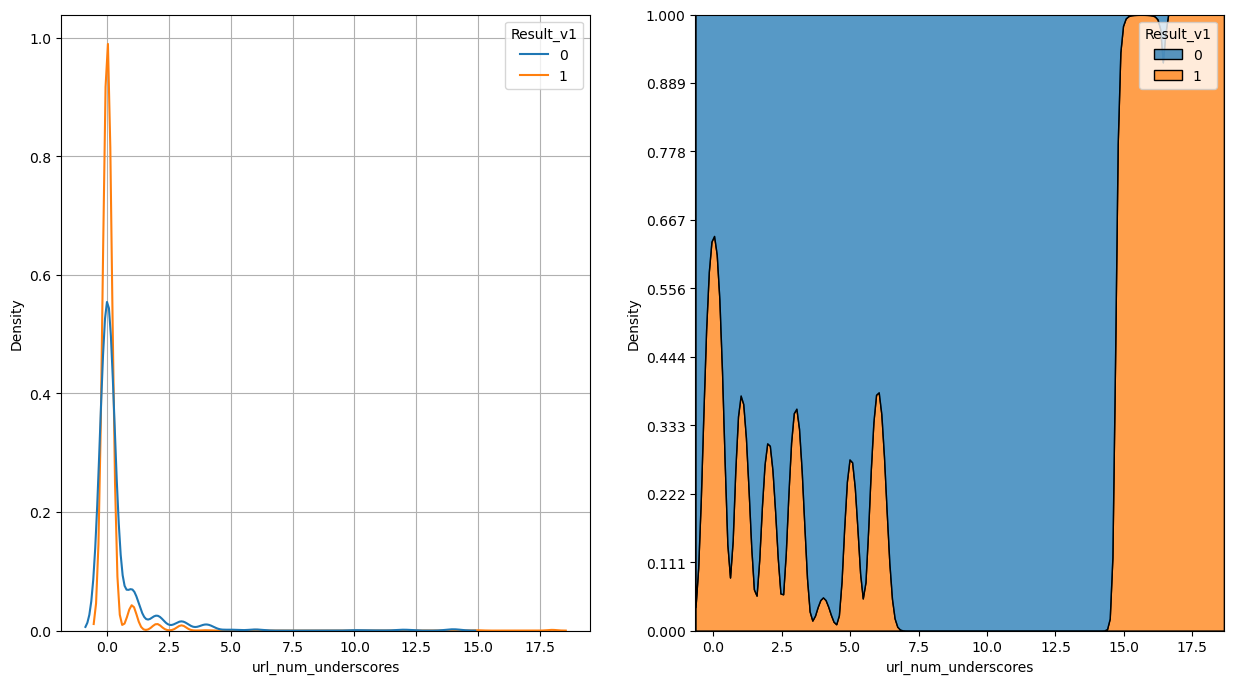

Optimization terminated successfully.
         Current function value: 0.682097
         Iterations 6
url_num_underscores    4.394527e-13
dtype: float64
--------------------------------------------------
url_query_len
   Result_v1  url_query_len
0          0       0.000000
1          1       9.550941


c:\Users\mskyu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\mskyu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


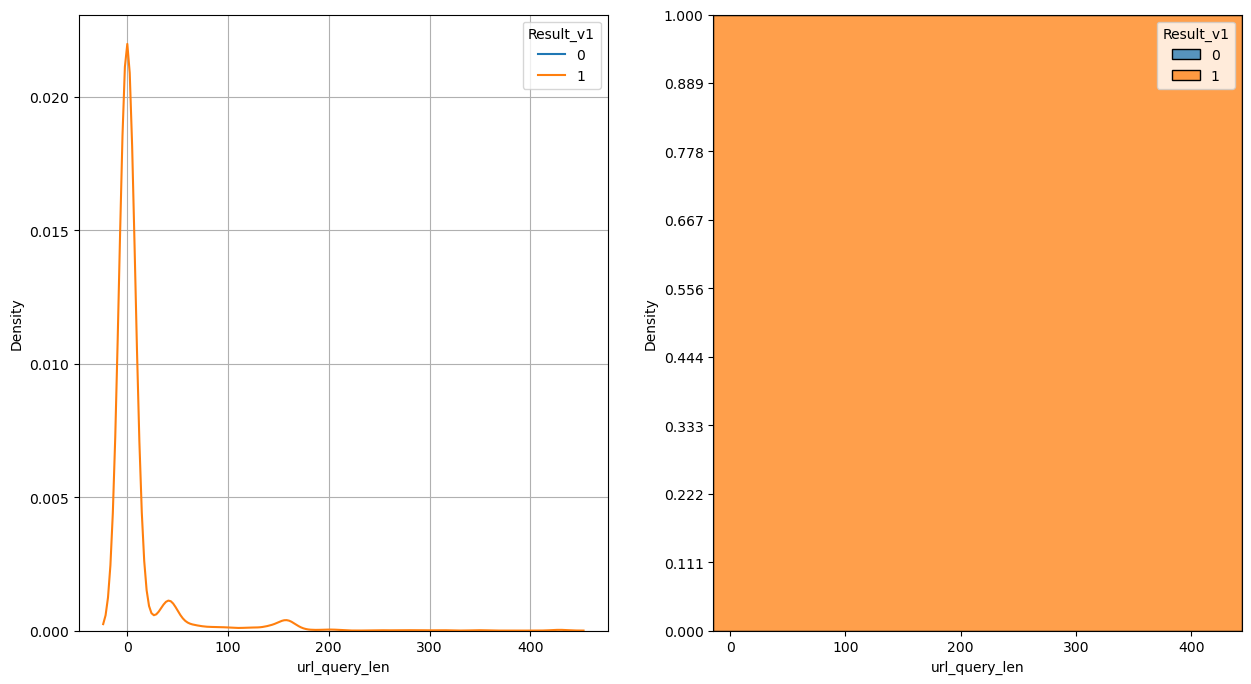

         Current function value: 0.649991
         Iterations: 35
url_query_len    0.999577
dtype: float64
--------------------------------------------------
url_num_query_para
   Result_v1  url_num_query_para
0          0            0.000000
1          1            0.211517


c:\Users\mskyu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\mskyu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
c:\Users\mskyu\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


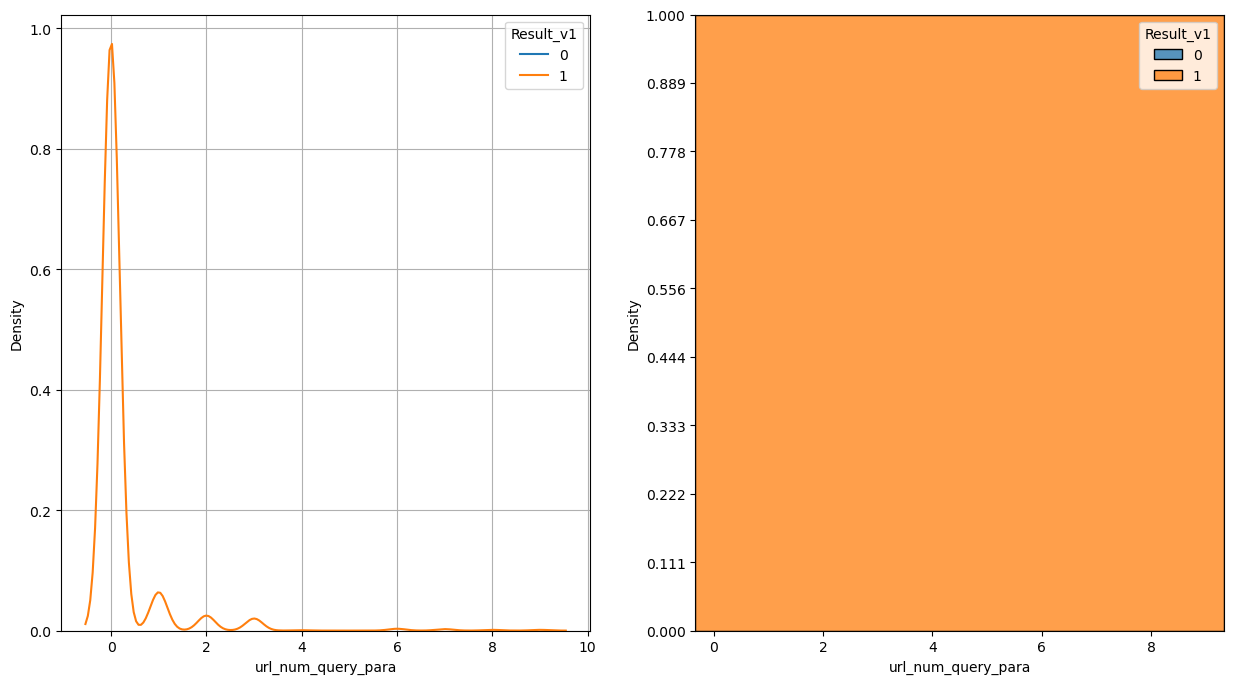

         Current function value: 0.656616
         Iterations: 35
url_num_query_para    0.997772
dtype: float64
--------------------------------------------------
url_ip_present
   Result_v1  url_ip_present
0          0        0.079203
1          1        0.041528


c:\Users\mskyu\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


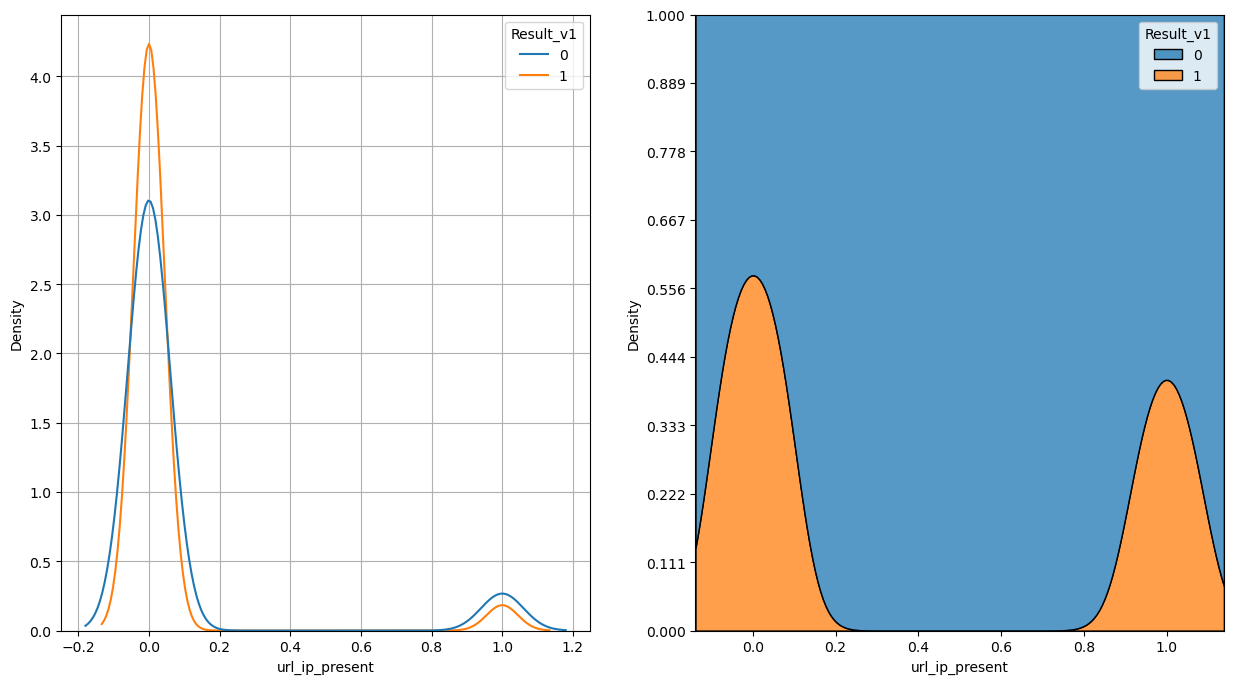

Optimization terminated successfully.
         Current function value: 0.689900
         Iterations 4
url_ip_present    0.000002
dtype: float64
--------------------------------------------------
url_entropy
   Result_v1  url_entropy
0          0     4.164252
1          1     4.294625


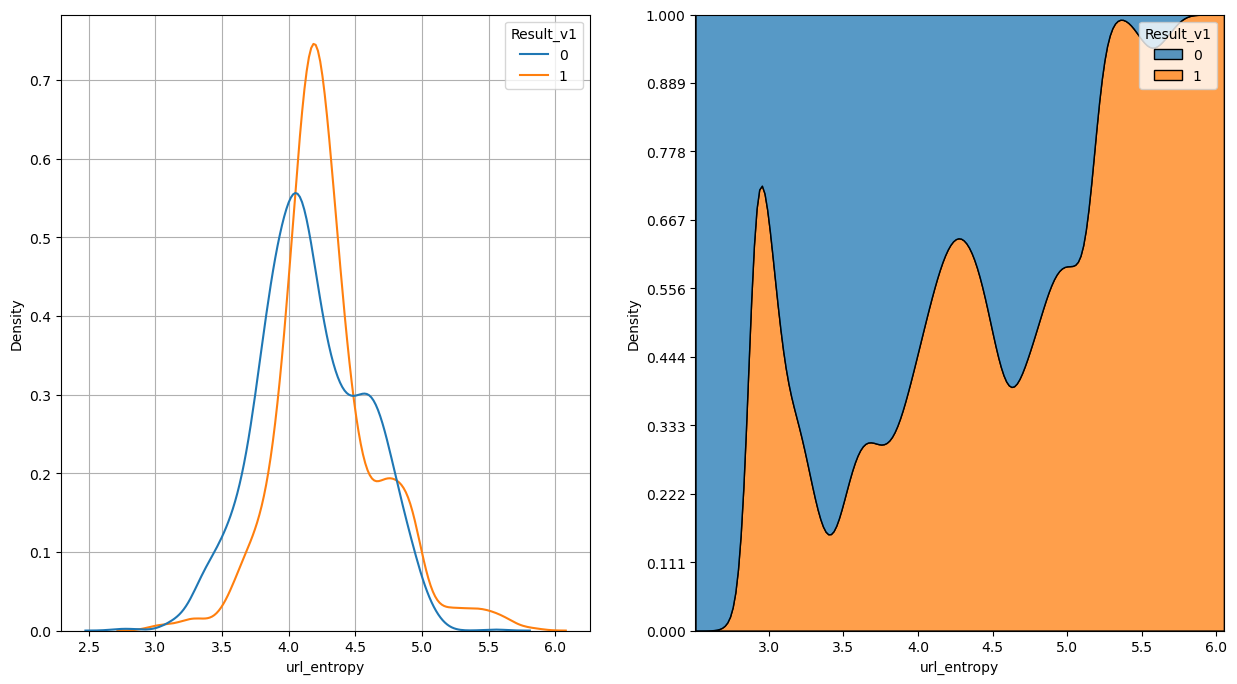

Optimization terminated successfully.
         Current function value: 0.693146
         Iterations 2
url_entropy    0.915585
dtype: float64
--------------------------------------------------
url_port
   Result_v1  url_port
0          0  0.002694
1          1  0.001661


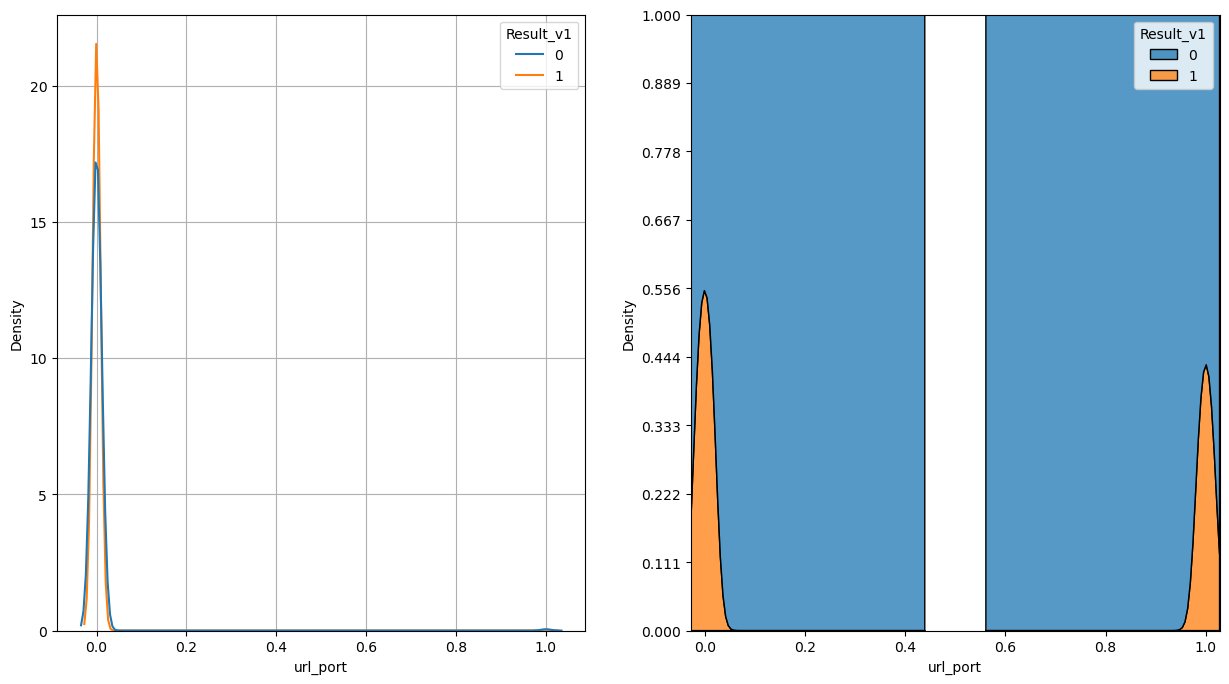

Optimization terminated successfully.
         Current function value: 0.693078
         Iterations 4
url_port    0.484254
dtype: float64
--------------------------------------------------
html_num_tags('iframe')
   Result_v1  html_num_tags('iframe')
0          0                 0.240302
1          1                 0.200997


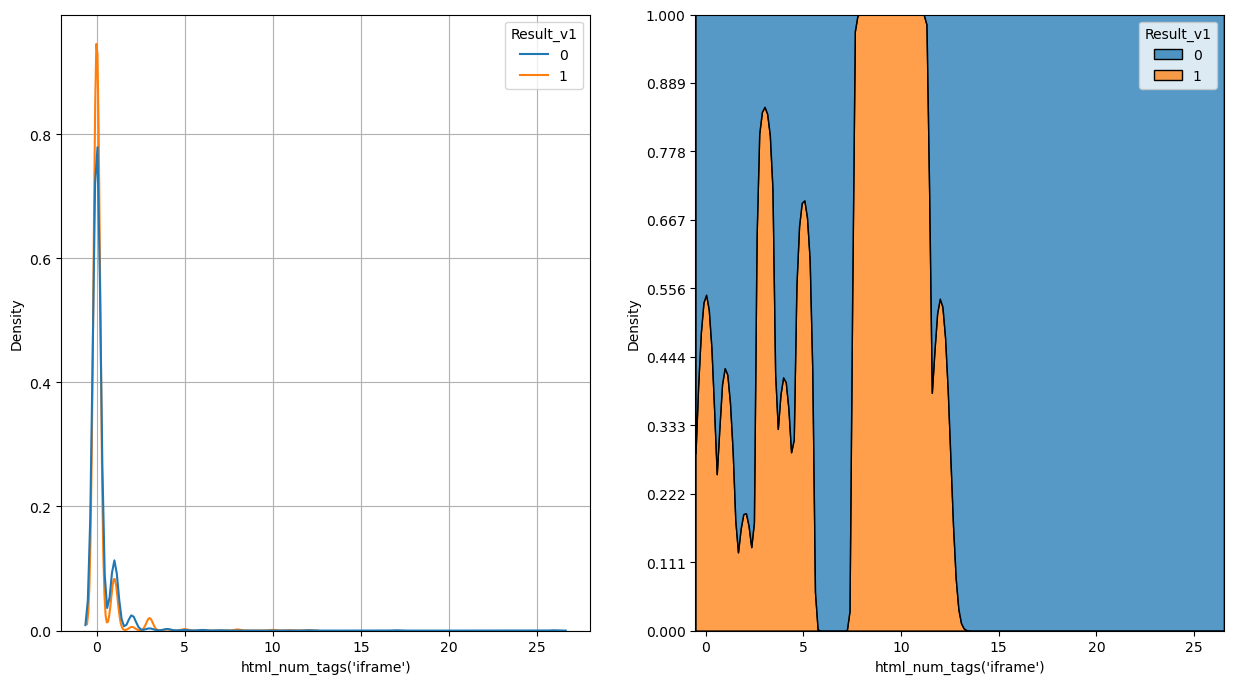

Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 4
html_num_tags('iframe')    0.146136
dtype: float64
--------------------------------------------------
html_num_tags('script')
   Result_v1  html_num_tags('script')
0          0                11.297953
1          1                 6.207087


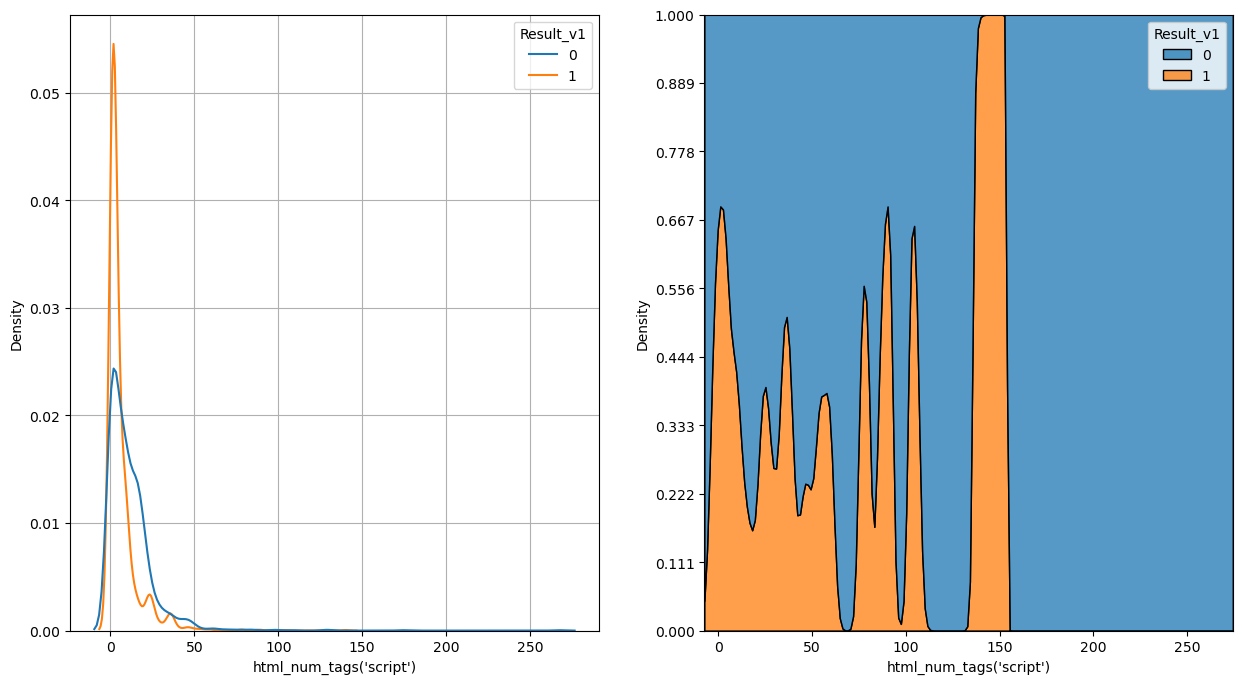

Optimization terminated successfully.
         Current function value: 0.676166
         Iterations 5
html_num_tags('script')    1.359310e-24
dtype: float64
--------------------------------------------------
html_num_tags('embed')
   Result_v1  html_num_tags('embed')
0          0                0.033405
1          1                0.002215


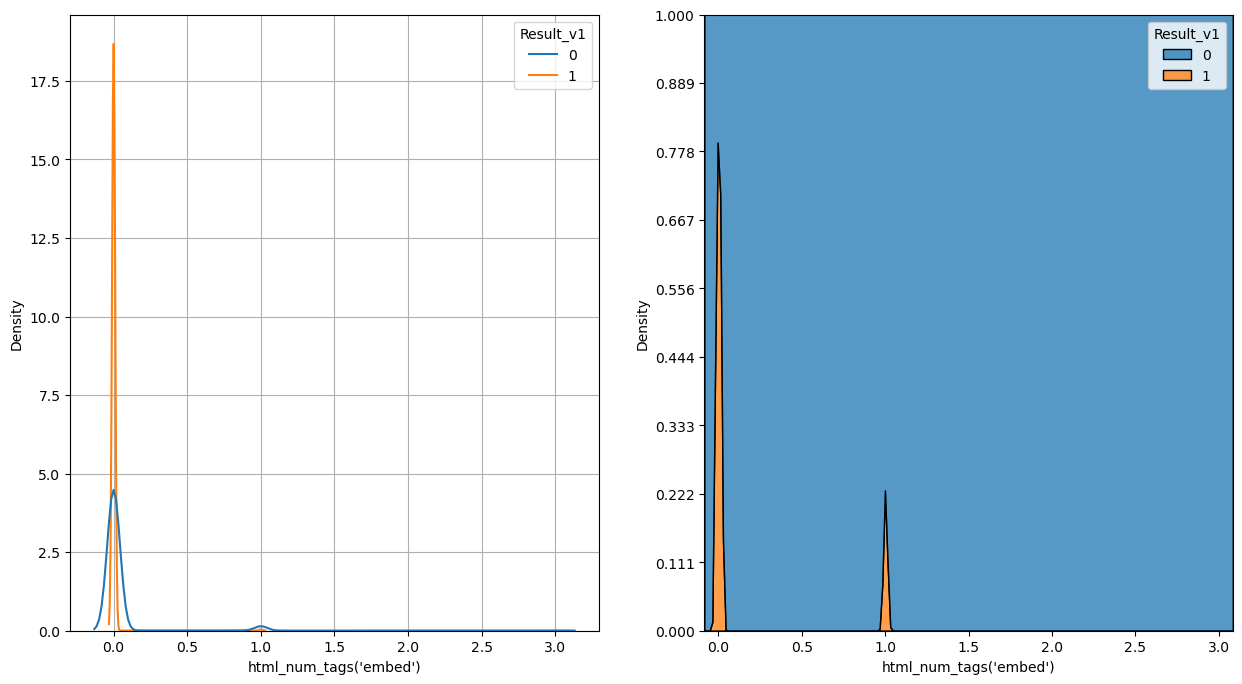

Optimization terminated successfully.
         Current function value: 0.685425
         Iterations 7
html_num_tags('embed')    3.335172e-07
dtype: float64
--------------------------------------------------
html_num_tags('object')
   Result_v1  html_num_tags('object')
0          0                 0.053341
1          1                 0.003876


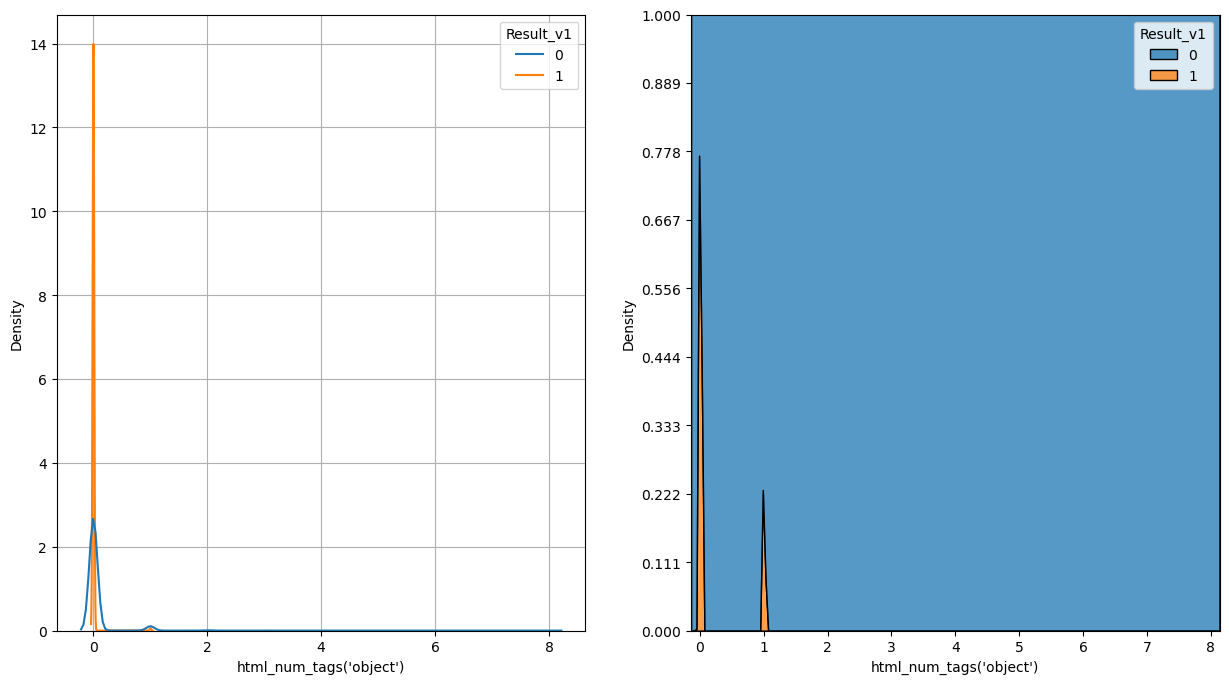

Optimization terminated successfully.
         Current function value: 0.683452
         Iterations 7
html_num_tags('object')    4.489999e-09
dtype: float64
--------------------------------------------------
html_num_tags('div')
   Result_v1  html_num_tags('div')
0          0             93.733297
1          1             47.282392


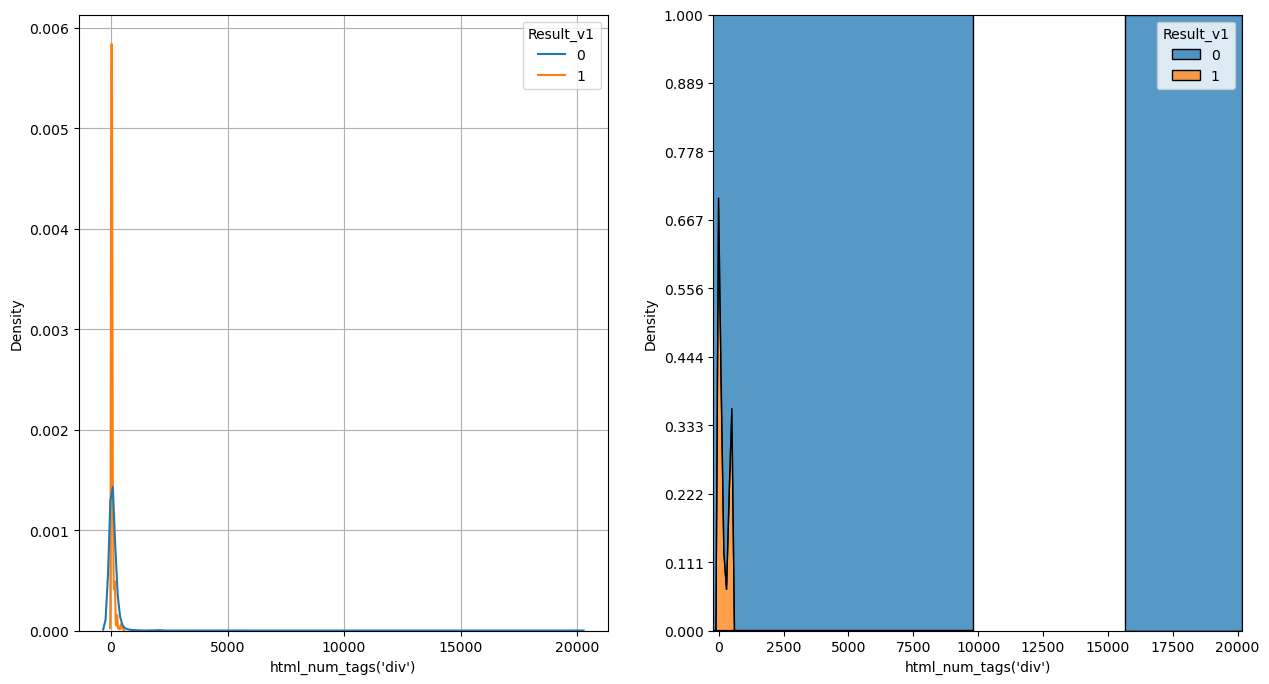

Optimization terminated successfully.
         Current function value: 0.684391
         Iterations 6
html_num_tags('div')    4.049643e-12
dtype: float64
--------------------------------------------------
html_num_tags('head')
   Result_v1  html_num_tags('head')
0          0               0.994612
1          1               1.001661


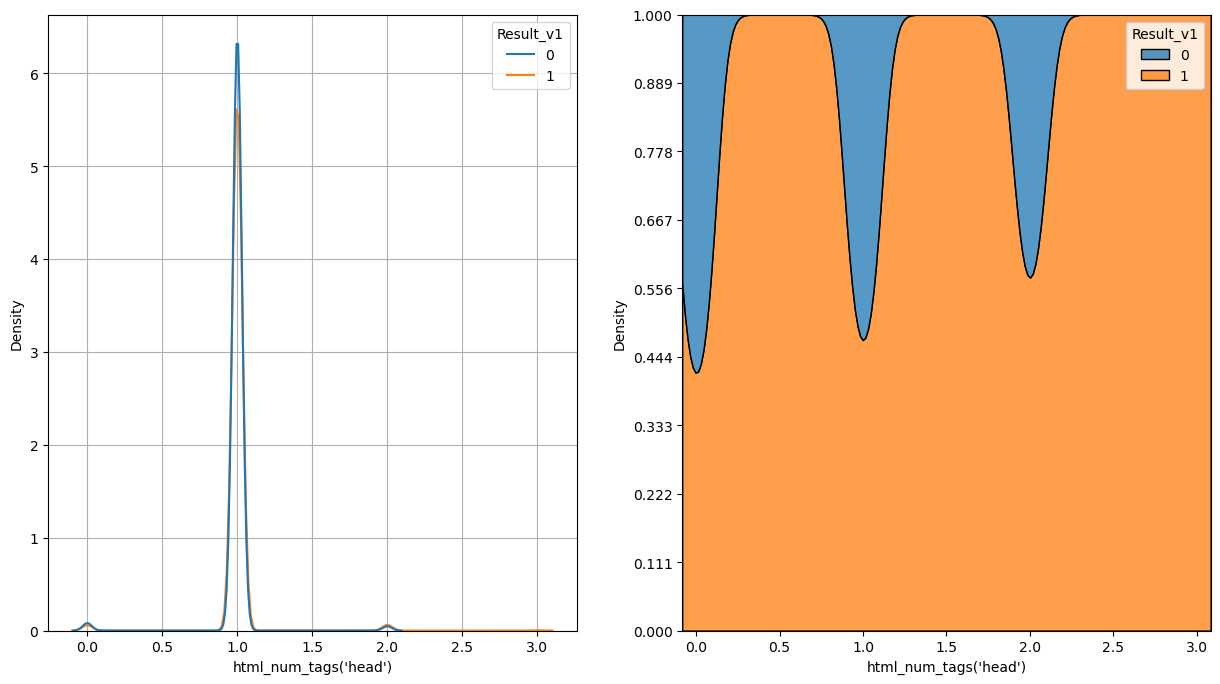

Optimization terminated successfully.
         Current function value: 0.693097
         Iterations 3
html_num_tags('head')    0.544368
dtype: float64
--------------------------------------------------
html_num_tags('body')
   Result_v1  html_num_tags('body')
0          0               0.991918
1          1               1.042082


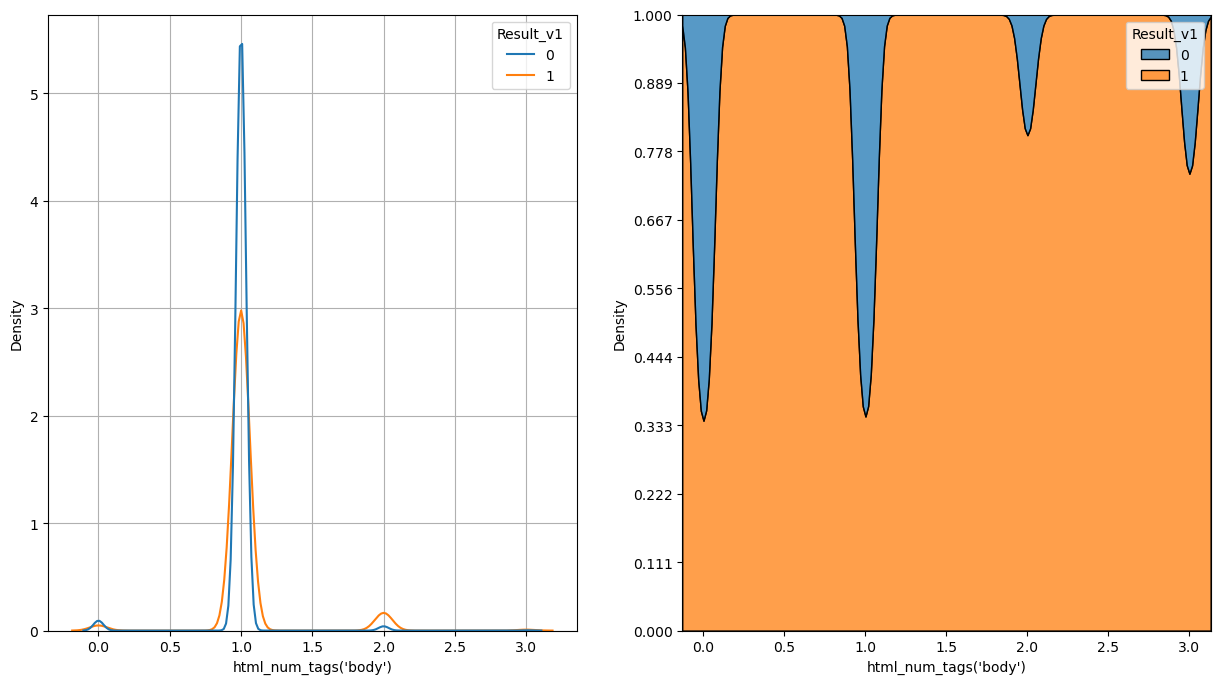

Optimization terminated successfully.
         Current function value: 0.693089
         Iterations 3
html_num_tags('body')    0.515296
dtype: float64
--------------------------------------------------
html_num_tags('form')
   Result_v1  html_num_tags('form')
0          0               0.839440
1          1               1.223699


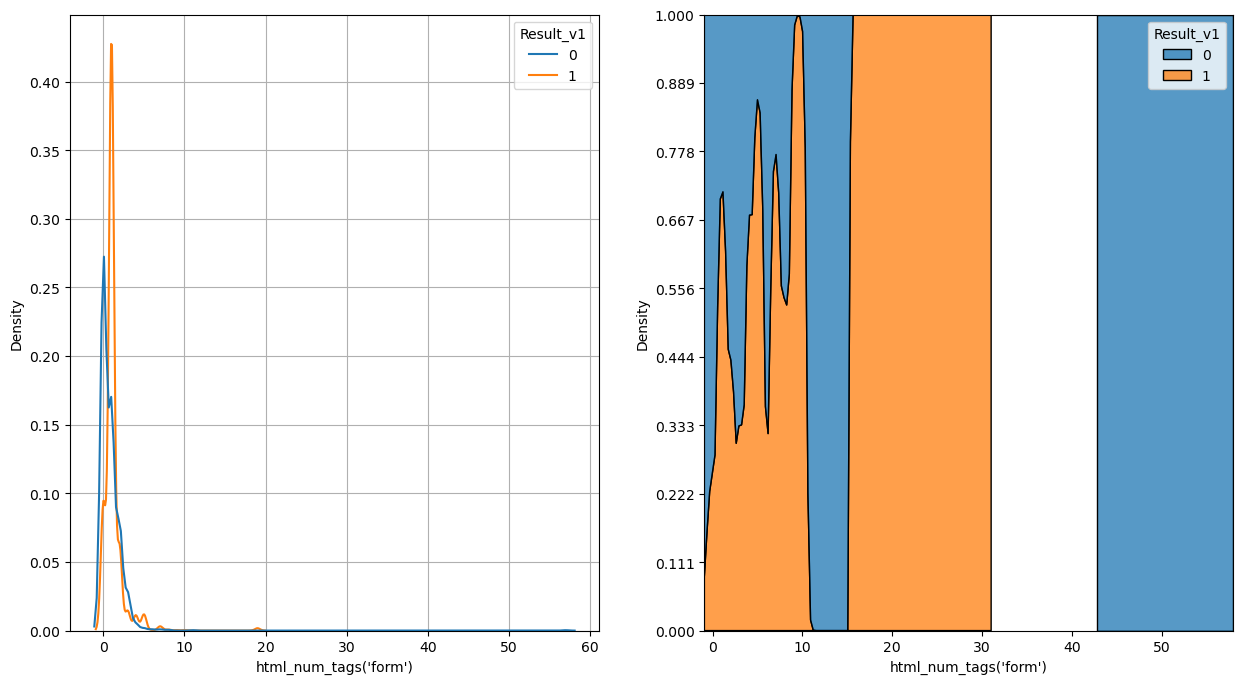

Optimization terminated successfully.
         Current function value: 0.687675
         Iterations 5
html_num_tags('form')    2.788460e-09
dtype: float64
--------------------------------------------------
html_num_tags('a')
   Result_v1  html_num_tags('a')
0          0          107.371767
1          1           23.859358


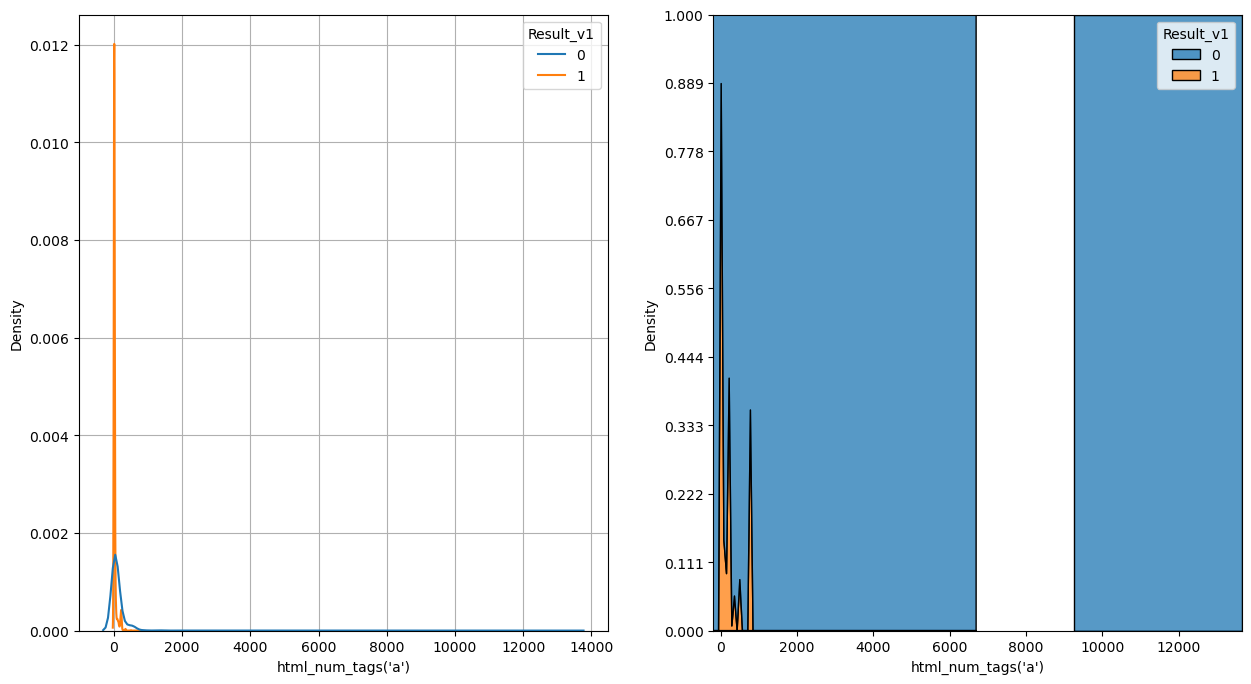

Optimization terminated successfully.
         Current function value: 0.651212
         Iterations 7
html_num_tags('a')    3.411547e-39
dtype: float64
--------------------------------------------------


In [21]:
for c in col:
    feature_plot(c)

In [22]:
# 로지스틱 회귀 pvalue 검증 시 관계 있는 feature
pvalue_col = ['url_num_hyphens_dom', 'url_path_len', 'url_domain_len', 'url_num_underscores', 'url_ip_present', "html_num_tags('script')", "html_num_tags('embed')", "html_num_tags('object')", "html_num_tags('div')", "html_num_tags('form')", "html_num_tags('a')"]

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [23]:
# 중복 데이터 제거를 제거합니다.
data = data.drop('url_hostname_len', axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_num_dots             3662 non-null   float64
 5   url_num_underscores      3662 non-null   float64
 6   url_query_len            3662 non-null   float64
 7   url_num_query_para       3662 non-null   float64
 8   url_ip_present           3662 non-null   float64
 9   url_entropy              3662 non-null   float64
 10  url_port                 3662 non-null   float64
 11  html_num_tags('iframe')  3662 non-null   float64
 12  html_num_tags('script')  3662 non-null   float64
 13  html_num_tags('embed')   3662 non-null   float64
 14  html_num_tags('object') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 1로 'malicious'은 -1로 변경해주세요. 삭제 후 df['Result_v1'] 전후 데이터를 비교해 보세요.<span>

In [25]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.
# data[target] = data[target].map({-1: 1, 1: 0})

In [26]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
data[target].unique()

array([1, 0], dtype=int64)

---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [27]:
# 결측치를 적절히 처리해줍니다.
data = data.dropna(axis=0)

In [28]:
# 결축치의 존재를 확인합니다.
data.shape

(3662, 21)

---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

모든 값 0으로 불필요한 컬럼 / 의미 없는 index 컬럼 삭제

In [29]:
# drop_col = ['url_chinese_present', "html_num_tags('applet')", 'Unnamed: 0']
# data = data.drop(drop_col, axis=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3662 entries, 0 to 3663
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3662 non-null   float64
 1   url_num_hyphens_dom      3662 non-null   float64
 2   url_path_len             3662 non-null   float64
 3   url_domain_len           3662 non-null   float64
 4   url_num_dots             3662 non-null   float64
 5   url_num_underscores      3662 non-null   float64
 6   url_query_len            3662 non-null   float64
 7   url_num_query_para       3662 non-null   float64
 8   url_ip_present           3662 non-null   float64
 9   url_entropy              3662 non-null   float64
 10  url_port                 3662 non-null   float64
 11  html_num_tags('iframe')  3662 non-null   float64
 12  html_num_tags('script')  3662 non-null   float64
 13  html_num_tags('embed')   3662 non-null   float64
 14  html_num_tags('object') 

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [31]:
x = data.drop(target, axis=1)
y = data[target]

In [32]:
x.shape, y.shape

((3662, 20), (3662,))

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3)

In [34]:
x_train_f = x_train[pvalue_col]
x_val_f = x_val[pvalue_col]

In [35]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.fit_transform(x_val)

In [36]:
data.to_csv('preprocess_data.csv')